# <center>**Stack Overflow Developer Survey 2020: Exploratory Data Analysis**<center>

## **Description**
### With nearly 65,000 responses fielded from over 180 countries and dependent territories, 2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open-source software.
&nbsp;

In [5]:
import pandas as pd

In [466]:
import numpy as np

In [6]:
survey_raw_df=pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_public.csv')

In [7]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [8]:
schema_raw=pd.read_csv('./data/stack-overflow-developer-survey-2020/survey_results_schema.csv',index_col='Column').QuestionText

In [9]:
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

## **Data Preparation & Cleaning**

In [11]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

### Selecting specific columns from the 60 available to focus on demographics, programming experience, and employment allows for a more targeted analysis. By narrowing down the data to these key areas, we can gain deeper insights into the relationships between these factors and career development in the tech industry.
&nbsp;

In [13]:
len(selected_columns)

20

In [14]:
survey_df=survey_raw_df[selected_columns].copy()

In [15]:
schema_df=schema_raw[selected_columns]

In [16]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
schema_df

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [18]:
survey_df.shape

(64461, 20)

In [19]:
schema_df.shape

(20,)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [21]:
survey_df.YearsCodePro.unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [22]:
survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro']=pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

### Converting columns such as Age1stCode and YearsCode into numeric values where possible enables more effective analysis. This transformation allows for statistical operations, comparisons, and visualizations that can reveal important patterns or correlations within the data
&nbsp;

In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [25]:
survey_df.drop(survey_df[survey_df.Age>100].index,inplace=True)
survey_df.drop(survey_df[survey_df.Age<10].index,inplace=True)

In [26]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index,inplace=True)

In [28]:
def gender_fix(x):
    if type(x)==str and ';' in x:
        x=np.nan
    else:
        x=x
    return x

### Since multiple gender options could be selected in the survey, some respondents chose more than one, which creates inconsistent data. To address this, the gender column is being cleaned by converting entries with more than one selected gender to 'NaN'. 
&nbsp;

In [30]:
survey_df['Gender']=survey_df['Gender'].apply(gender_fix)

In [31]:
survey_df.Gender.value_counts()

Gender
Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: count, dtype: int64

In [32]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
30161,Indonesia,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,18.0,3.0,NaN,HTML/CSS;JavaScript;PHP;SQL,C#;HTML/CSS;Java;JavaScript;PHP;Python;SQL,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Data or business analyst;Developer, back-end;D...",8.0,Slightly dissatisfied,Industry that I’d be working in;Flex time or a...,Rarely: 1-2 days per year or less,Somewhat important
57307,Germany,27.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,18.0,10.0,4.0,Java;JavaScript;Python;SQL,JavaScript;Python,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed part-time,Academic researcher;Data scientist or machine ...,20.0,Slightly dissatisfied,"Industry that I’d be working in;Languages, fra...",NaN,Very important
38934,Brazil,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,NaN,NaN,NaN,Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScr...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Ruby...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Fairly important
18885,United Kingdom,NaN,NaN,"Secondary school (e.g. American high school, G...",NaN,No,8.0,8.0,2.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,NaN,Every few months,Visit Stack Overflow,Employed part-time,"Designer;Developer, full-stack;Developer, mobi...",5.0,Neither satisfied nor dissatisfied,Remote work options;Family friendliness,Never,Not at all important/not necessary
50989,Germany,32.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A natural science (such as biology, chemistry,...",No,12.0,20.0,2.0,C++;Python,C++;Python,Once a decade,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, desktop or enterprise applications",40.0,Slightly satisfied,Industry that I’d be working in;Office environ...,Never,Fairly important
13979,United States,30.0,Man,Some college/university study without earning ...,"Information systems, information technology, o...",No,13.0,6.0,6.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Rarely: 1-2 days per year or less,Not at all important/not necessary
49374,India,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,NaN,6.0,2.0,Python,Python,Every few months,Visit Stack Overflow;Panic;Watch help / tutori...,Employed full-time,Academic researcher;Data scientist or machine ...,55.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Specific depa...,Often: 1-2 days per week or more,Fairly important
33951,Romania,26.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",No,26.0,NaN,NaN,HTML/CSS;PHP,C++;HTML/CSS;JavaScript;PHP;Python,NaN,Call a coworker or friend;Visit Stack Overflow...,"Not employed, but looking for work","Developer, back-end",NaN,NaN,Flex time or a flexible schedule;Office enviro...,NaN,NaN
2317,Brazil,24.0,Man,NaN,"Information systems, information technology, o...",Yes,15.0,10.0,1.0,C#;HTML/CSS;JavaScript;SQL;TypeScript,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",40.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Somewhat important
8484,India,26.0,Man,"Bachelor’s degree (B.

## **Exploratory Analysis and Visualization**

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams.update({'font.size': 14})

## Country

In [36]:
top_countries=survey_df.Country.value_counts().head(15)
top_countries

Country
United States         12468
India                  8393
United Kingdom         3894
Germany                3879
Canada                 2189
France                 1893
Brazil                 1811
Netherlands            1340
Poland                 1263
Australia              1208
Spain                  1160
Italy                  1115
Russian Federation     1091
Sweden                  884
Pakistan                808
Name: count, dtype: int64

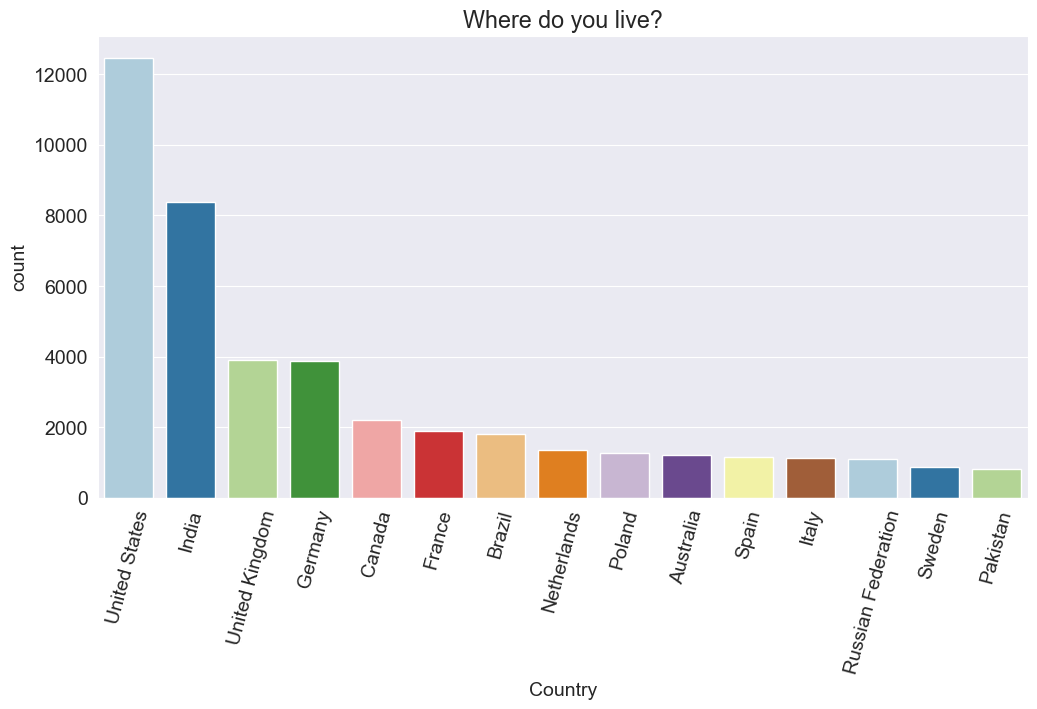

In [37]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index,y=top_countries,palette='Paired')
plt.title(schema_df.Country)
plt.xticks(rotation=75);

In [38]:
languages_df=pd.read_csv('./data/stack-overflow-developer-survey-2020/countries-languages.csv')

In [39]:
languages_df

,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
1,Albania,"Albanian (Tosk is the official dialect), Greek"
2,Algeria,"Arabic (official), French, Berber dialects"
3,Andorra,"Catalán (official), French, Castilian, Portuguese"
4,Angola,"Portuguese (official), Bantu and other African..."
...,...,...
193,Vietnam,Vietnamese (official); English (increasingly f...
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Arabic
196,Zambia,"English (official); major vernaculars: Bemba, ..."


In [40]:
languages_df['English_speaking']=np.where(languages_df['Languages Spoken'].str.contains('English'),True,False)

In [41]:
languages_df.drop(columns='Languages Spoken',inplace=True)

In [42]:
languages_df

,Country,English_speaking
0,Afghanistan,False
1,Albania,False
2,Algeria,False
3,Andorra,False
4,Angola,False
...,...,...
193,Vietnam,True
194,Western Sahara (proposed state),False
195,Yemen,False
196,Zambia,True


In [43]:
survey_df=survey_df.merge(languages_df,on='Country')

In [44]:
# Percentange of English speaking countries

survey_df[survey_df.English_speaking==True].English_speaking.count()/survey_df.English_speaking.count()*100

62.89876183539695

### Since the survey was conducted in English, it's not surprising that nearly 63% of the responses came of people from English-speaking countries.
&nbsp;

## Age

In [47]:
schema_df.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

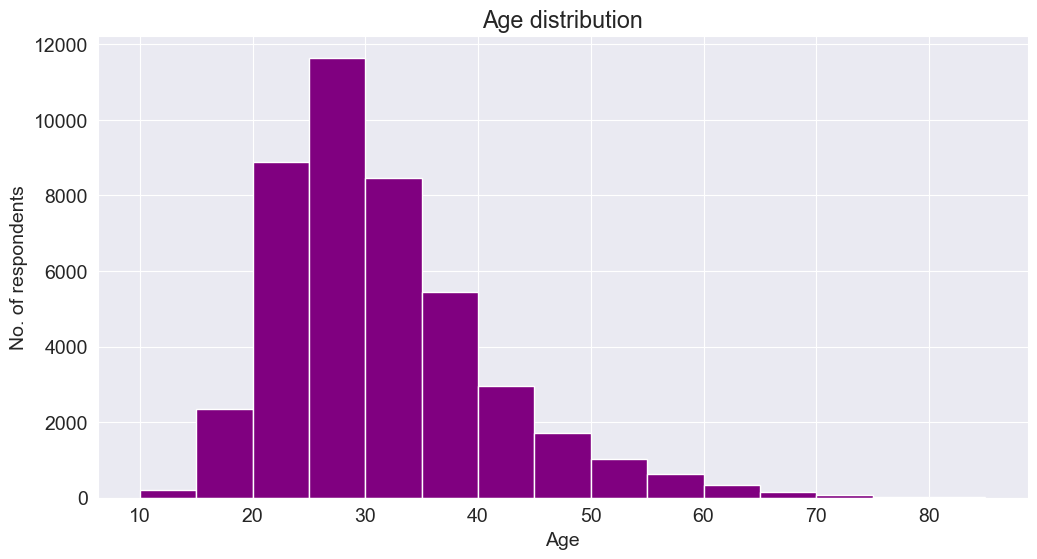

In [48]:
plt.figure(figsize=(12,6))
plt.hist(survey_df.Age,bins=np.arange(10,90,5),color='purple')
plt.xlabel('Age')
plt.ylabel('No. of respondents')
plt.title('Age distribution');

In [49]:
def age_grouper(x):
    if x<10:
        return 'Less than 10 years'
    elif x>=10 and x<18:
        return '10-18 years'
    elif x>=18 and x<30:
        return '18-30 years'
    elif x>=30 and x<45:
        return '30-45 years'
    elif x>=45 and x<60:
        return '45-60 years'
    elif x>=60:
        return 'Older than 60 years'

In [50]:
survey_df['AgeGroup']=survey_df.Age.apply(age_grouper)

In [51]:
survey_df.AgeGroup.value_counts()

AgeGroup
18-30 years            21960
30-45 years            16881
45-60 years             3364
10-18 years             1128
Older than 60 years      591
Name: count, dtype: int64

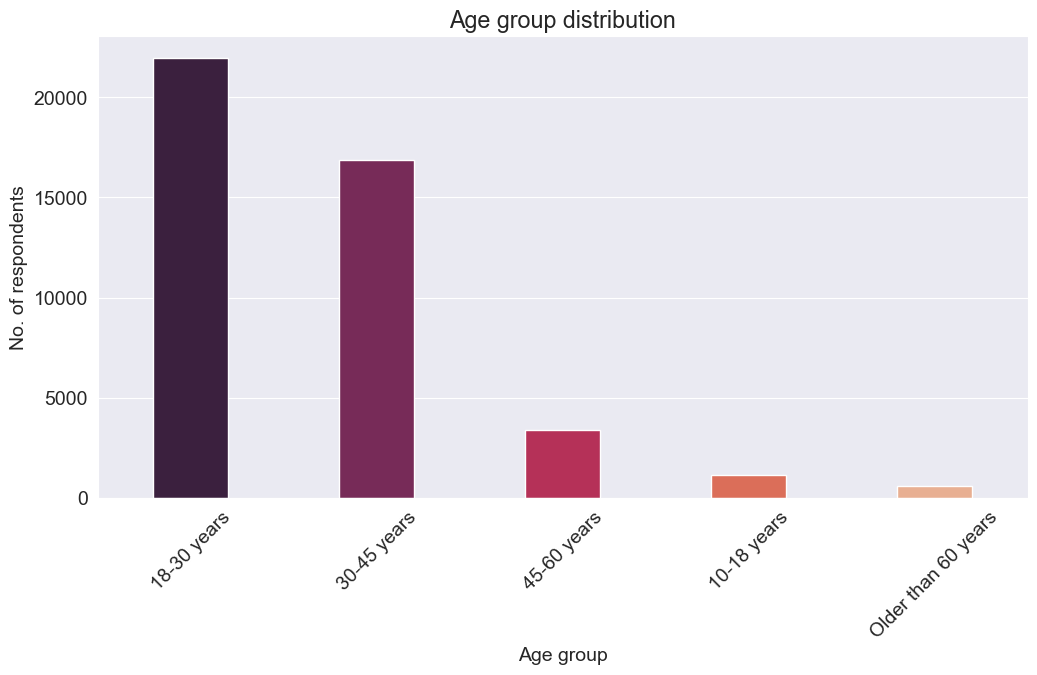

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x=survey_df.AgeGroup.value_counts().index,y=survey_df.AgeGroup.value_counts(),width=0.4,palette='rocket')
plt.ylabel('No. of respondents')
plt.xlabel('Age group')
plt.xticks(rotation=45)
plt.title('Age group distribution');

&nbsp;
## Gender

In [54]:
gender_counts=survey_df.Gender.value_counts()
gender_counts

Gender
Man                                                  44439
Woman                                                 3733
Non-binary, genderqueer, or gender non-conforming      376
Name: count, dtype: int64

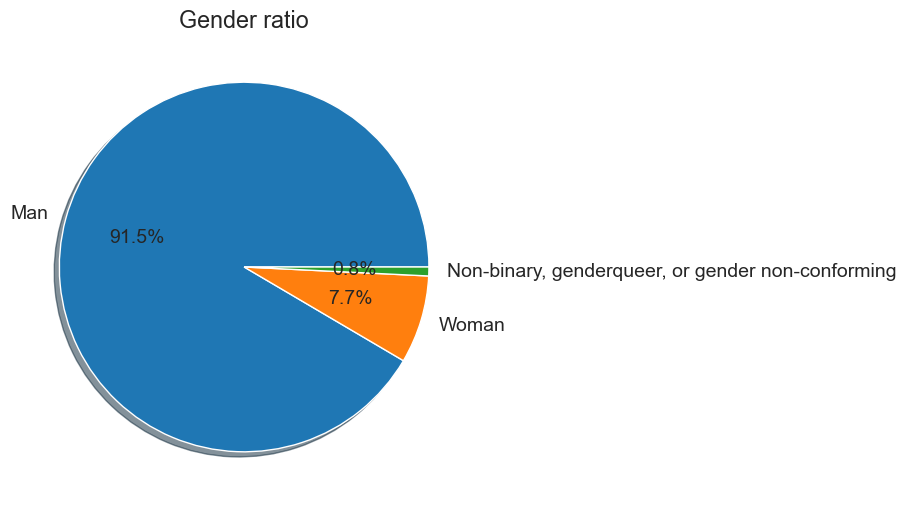

In [55]:
plt.figure(figsize=(12,6))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',shadow=True)
plt.title('Gender ratio');

### The graph indicates that only about 8% of survey respondents identify as women or non-binary, highlighting the underrepresentation of these groups in the programming community. This disparity underscores the need for initiatives and practices aimed at increasing the participation of women and non-binary individuals in tech. Despite progress, the field remains predominantly male, signaling that further efforts are essential to create a more inclusive and diverse programming environment.
&nbsp;

In [57]:
x=survey_df.groupby(['EdLevel','Gender'])['Gender'].describe()
x

count  \
EdLevel                                            Gender                                                     
Associate degree (A.A., A.S., etc.)                Man                                                 1442   
                                                   Non-binary, genderqueer, or gender non-conforming     14   
                                                   Woman                                                100   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)       Man                                                20002   
                                                   Non-binary, genderqueer, or gender non-conforming    138   
                                                   Woman                                               1882   
I never completed any formal education             Man                                                  274   
                                                   Non-binary, genderqueer, or gender non-conforming      6   
                                                   Woman                                                 15   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)    Man                                                 9811   
                                                   Non-binary, genderqueer, or gender non-conforming     67   
                                                   Woman                                                906   
Other doctoral degree (Ph.D., Ed.D., etc.)         Man                                                 1258   
                                                   Non-binary, genderqueer, or gender non-conforming     13   
                                                   Woman                                                147   
Primary/elementary school                          Man                                                  731   
                                                   Non-binary, genderqueer, or gender non-conforming      6   
                                                   Woman                                                 20   
Professional degree (JD, MD, etc.)                 Man                                                  549   
                                                   Non-binary, genderqueer, or gender non-conforming      3   
                                                   Woman                                                 38   
Secondary school (e.g. American high school, Ge... Man                                                 3778   
                                                   Non-binary, genderqueer, or gender non-conforming     47   
                                                   Woman                                                201   
Some college/university study without earning a... Man                                                 5637   
                                                   Non-binary, genderqueer, or gender non-conforming     68   
                                                   Woman                                                323   

                                                                                                     unique  \
EdLevel                                            Gender                                                     
Associate degree (A.A., A.S., etc.)                Man                                                    1   
                                                   Non-binary, genderqueer, or gender non-conforming      1   
                                                   Woman                                                  1   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)       Man                                                    1   
                                                   Non-binary, genderqueer, or gender non-conforming      1   
                                                   Woman                                                 

In [58]:
list(x.loc[x.index[2::3],'count'])

[100, 1882, 15, 906, 147, 20, 38, 201, 323]

In [59]:
# Percentage for Man in different Education Levels

man_count=[]
for i in list(x.loc[x.index[0::3],'count']):
    man_count.append(i*100/survey_df[survey_df.Gender=='Man']['Gender'].count())

In [60]:
man_count

[3.244897499943743,
 45.01001372668152,
 0.6165755305024866,
 22.0774544881748,
 2.8308467787303946,
 1.6449515065595535,
 1.2354013366637413,
 8.501541438826257,
 12.684803888476338]

In [61]:
# Percentage for Woman in different Education Levels

woman_count=[]
for i in list(x.loc[x.index[2::3],'count']):
    woman_count.append(i*100/survey_df[survey_df.Gender=='Woman']['Gender'].count())

In [62]:
woman_count

[2.678810608090008,
 50.41521564425395,
 0.4018215912135012,
 24.270024109295473,
 3.937851593892312,
 0.5357621216180016,
 1.017948031074203,
 5.384409322260916,
 8.652558264130725]

In [63]:
man_woman_percentage_diff=np.array(woman_count)-np.array(man_count)
man_woman_percentage_diff

array([-0.56608689,  5.40520192, -0.21475394,  2.19256962,  1.10700482,
       -1.10918938, -0.21745331, -3.11713212, -4.03224562])

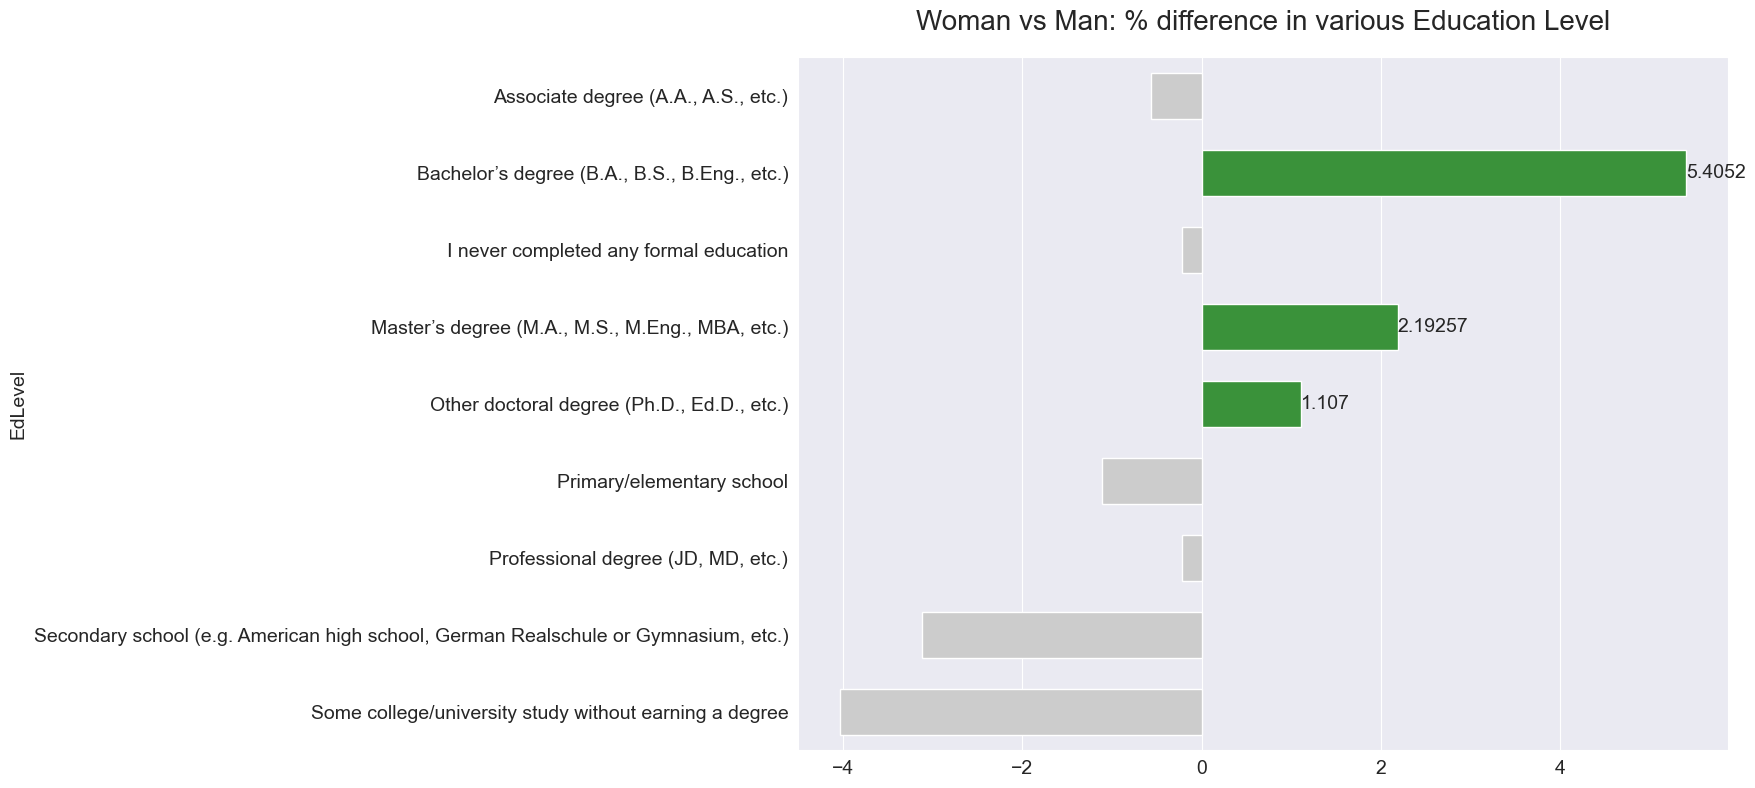

In [64]:
plt.figure(figsize=(12,9))
bar_plot=sns.barplot(x=man_woman_percentage_diff,y=survey_df.groupby('EdLevel').count().index,
            palette=['0.8','tab:green','0.8','tab:green','tab:green','0.8','0.8','0.8','0.8'],width=0.6)
plt.title('Woman vs Man: % difference in various Education Level',pad=20,size=20)
bar_plot.bar_label(bar_plot.containers[3])
bar_plot.bar_label(bar_plot.containers[4])
bar_plot.bar_label(bar_plot.containers[1]);

### The percentage of respondents with Bachelor’s, Master’s, or Ph.D. degrees is notably higher among women than men. This trend suggests that women in the tech community are more likely to pursue advanced education. It highlights the emphasis women place on formal qualifications to advance in a male-dominated field.

&nbsp;
## Education Level and Undergrad Major

In [67]:
percent_EdLevel=survey_df.EdLevel.value_counts()/survey_df.EdLevel.value_counts().sum()*100
percent_EdLevel

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          46.577343
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       22.750388
Some college/university study without earning a degree                                12.504057
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8.280737
Associate degree (A.A., A.S., etc.)                                                    3.222491
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2.951996
Primary/elementary school                                                              1.613950
Professional degree (JD, MD, etc.)                                                     1.296570
I never completed any formal education                                                 0.802467
Name: count, dtype: float64

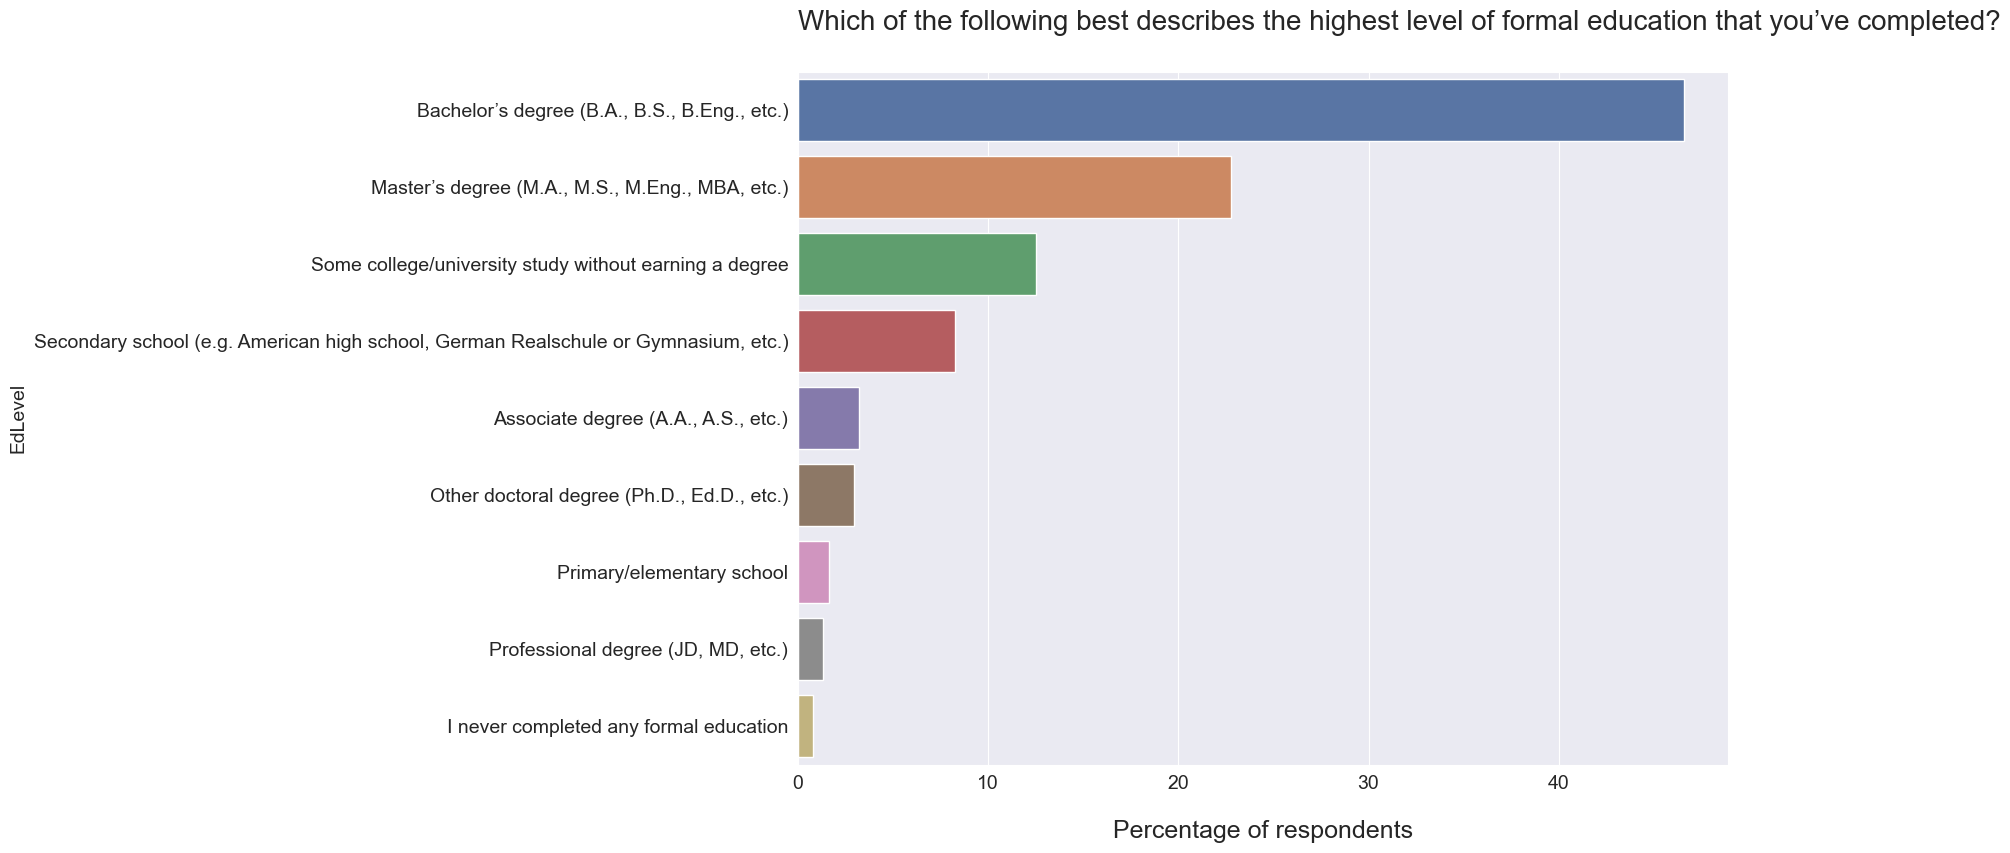

In [478]:
plt.figure(figsize=(12,9))
sns.barplot(y=percent_EdLevel.index,x=percent_EdLevel,palette='deep')
plt.title(schema_df.EdLevel,loc='left',pad=30,size=20)
plt.xlabel('Percentage of respondents',labelpad=20,size=18);

In [69]:
undergrad_percent=survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()
undergrad_percent

UndergradMajor
Computer science, computer engineering, or software engineering                   62.295581
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.264294
Information systems, information technology, or system administration              7.789230
A natural science (such as biology, chemistry, physics, etc.)                      4.301424
Mathematics or statistics                                                          3.524327
Web development or web design                                                      3.497951
A business discipline (such as accounting, finance, marketing, etc.)               2.672158
A humanities discipline (such as literature, history, philosophy, etc.)            1.996510
A social science (such as anthropology, psychology, political science, etc.)       1.858540
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.442600
I never declared a major                                         

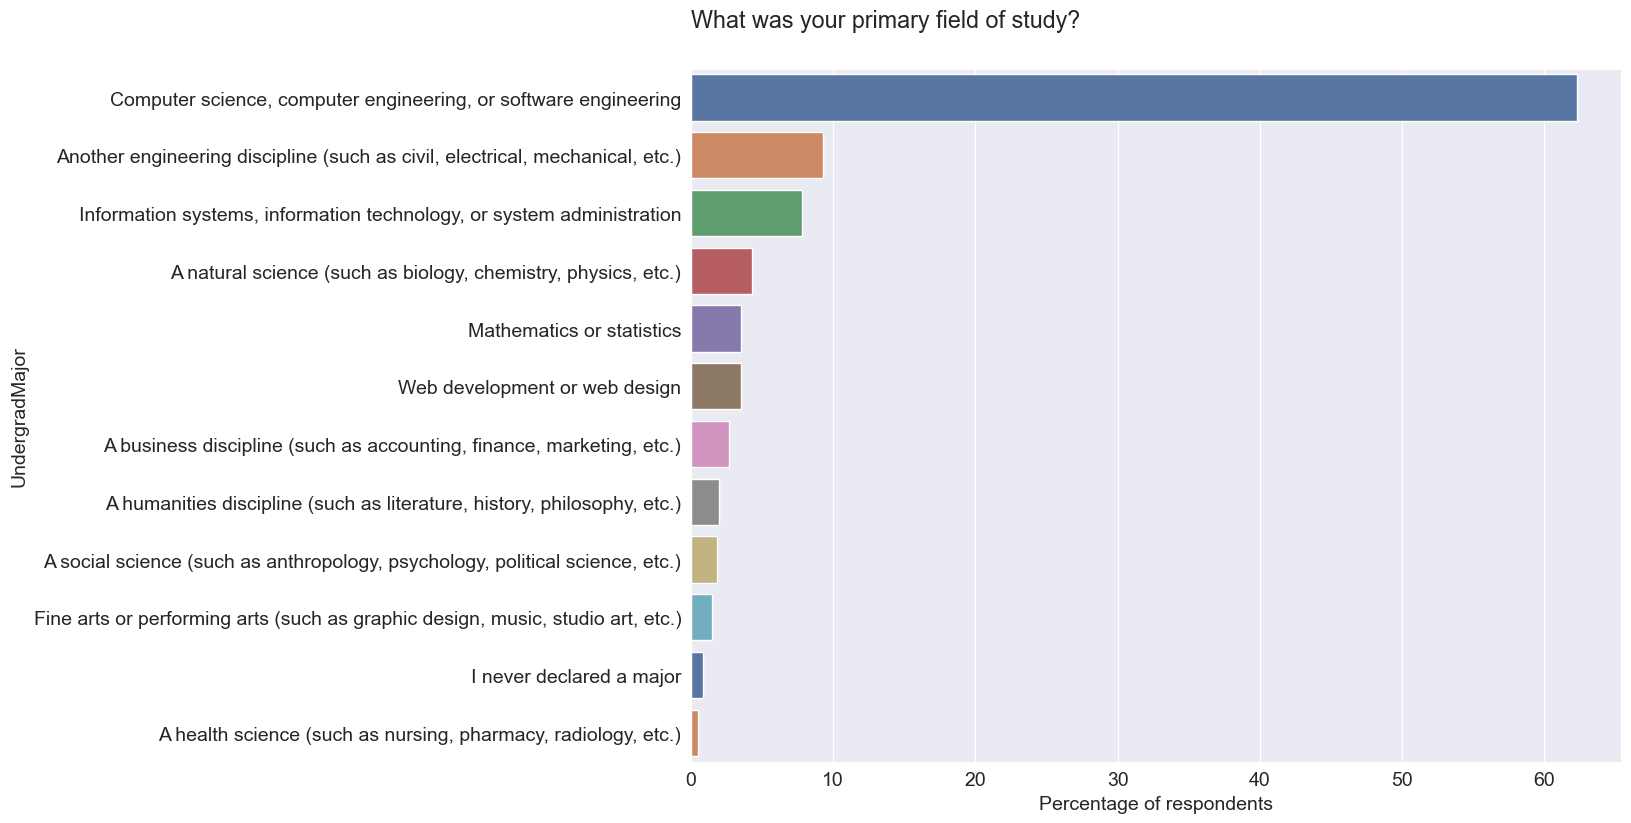

In [70]:
plt.figure(figsize=(12,9))
sns.barplot(y=undergrad_percent.index,x=undergrad_percent,palette='deep')
plt.title(schema_df.UndergradMajor,loc='left',pad=30)
plt.xlabel('Percentage of respondents');

In [71]:
schema_df.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [72]:
survey_df.NEWEdImpt.value_counts(dropna=False)

NEWEdImpt
NaN                                   14960
Fairly important                      12220
Very important                        11516
Somewhat important                    10943
Not at all important/not necessary     7524
Critically important                   4622
Name: count, dtype: int64

In [73]:
y=survey_df.groupby(['UndergradMajor','NEWEdImpt'])[['NEWEdImpt']].count()
y

NEWEdImpt
UndergradMajor                                     NEWEdImpt                                    
A business discipline (such as accounting, fina... Critically important                       44
                                                   Fairly important                          227
                                                   Not at all important/not necessary        383
                                                   Somewhat important                        354
                                                   Very important                            171
A health science (such as nursing, pharmacy, ra... Critically important                       24
                                                   Fairly important                           27
                                                   Not at all important/not necessary         69
                                                   Somewhat important                         43
                                                   Very important                             24
A humanities discipline (such as literature, hi... Critically important                       32
                                                   Fairly important                          163
                                                   Not at all important/not necessary        377
                                                   Somewhat important                        273
                                                   Very important                             72
A natural science (such as biology, chemistry, ... Critically important                      261
                                                   Fairly important                          421
                                                   Not at all important/not necessary        373
                                                   Somewhat important                        479
                                                   Very important                            360
A social science (such as anthropology, psychol... Critically important                       42
                                                   Fairly important                          149
                                                   Not at all important/not necessary        281
                                                   Somewhat important                        274
                                                   Very important                             87
Another engineering discipline (such as civil, ... Critically important                      401
                                                   Fairly important                         1051
                                                   Not at all important/not necessary        697
                                                   Somewhat important                       1057
                                                   Very important                            901
Computer science, computer engineering, or soft... Critically important                     3035
                                                   Fairly important                         7779
                                                   Not at all important/not necessary       2585
                                                   Somewhat important                       5629
                                                   Very important                           7817
Fine arts or performing arts (such as graphic d... Critically important                       15
                                                   Fairly important                          101
                                                   Not at all important/not necessary        287
                                                   Somewhat important                        213
                                                   Very important                             51
I never decla

In [74]:
comp_NEWEdImpt_percent=(y.iloc[30:35]*100)/y.iloc[30:35].sum()
comp_NEWEdImpt_percent

NEWEdImpt
UndergradMajor                                     NEWEdImpt                                    
Computer science, computer engineering, or soft... Critically important                11.305644
                                                   Fairly important                    28.977463
                                                   Not at all important/not necessary   9.629354
                                                   Somewhat important                  20.968523
                                                   Very important                      29.119017

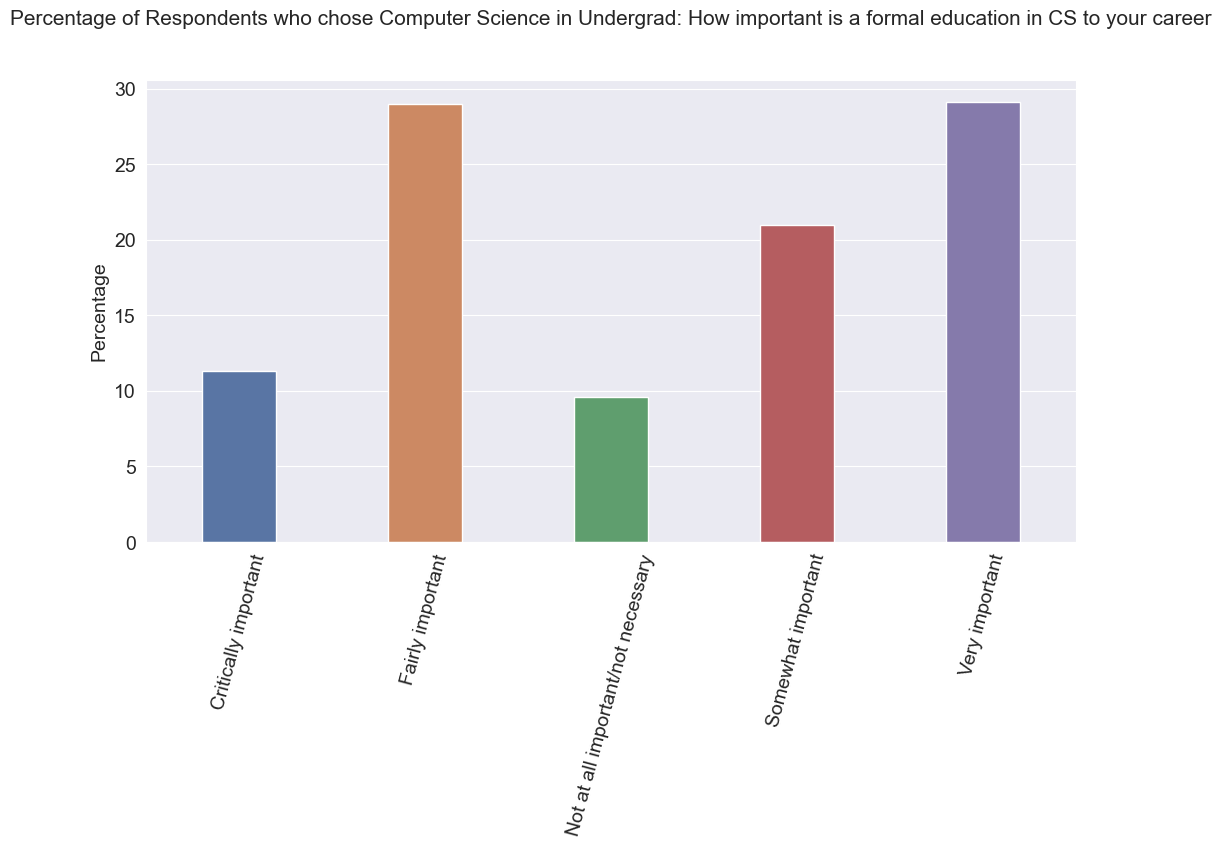

In [75]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Critically important','Fairly important','Not at all important/not necessary','Somewhat important','Very important'],
           y=list(comp_NEWEdImpt_percent.NEWEdImpt),width=0.4,palette='deep')
plt.xticks(rotation=75)
plt.title("Percentage of Respondents who chose Computer Science in Undergrad: How important is a formal education in CS to your career",fontsize=15,pad=40)
plt.ylabel('Percentage');

### The graph reveals that a majority of respondents who studied computer science in their undergraduate program believe that formal education in the field is crucial for building a career in computer science, with nearly 60% considering it important. However, it's noteworthy that almost 40% of these respondents feel that a formal CS education is not essential for a successful career in the industry. This suggests a significant portion of computer science graduates recognize alternative pathways to entering the field beyond traditional education.
&nbsp;

In [77]:
nonCS_NEWEdImpt=survey_df.drop(survey_df[survey_df.UndergradMajor=='Computer science, computer engineering, or software engineering'].index).groupby(['NEWEdImpt'])[['NEWEdImpt']].count()

In [78]:
nonCS_NEWEdImpt_percent=nonCS_NEWEdImpt*100/nonCS_NEWEdImpt.sum()
nonCS_NEWEdImpt_percent

,NEWEdImpt
NEWEdImpt,
Critically important,7.942943
Fairly important,22.227227
Not at all important/not necessary,24.719720
Somewhat important,26.596597
Very important,18.513514


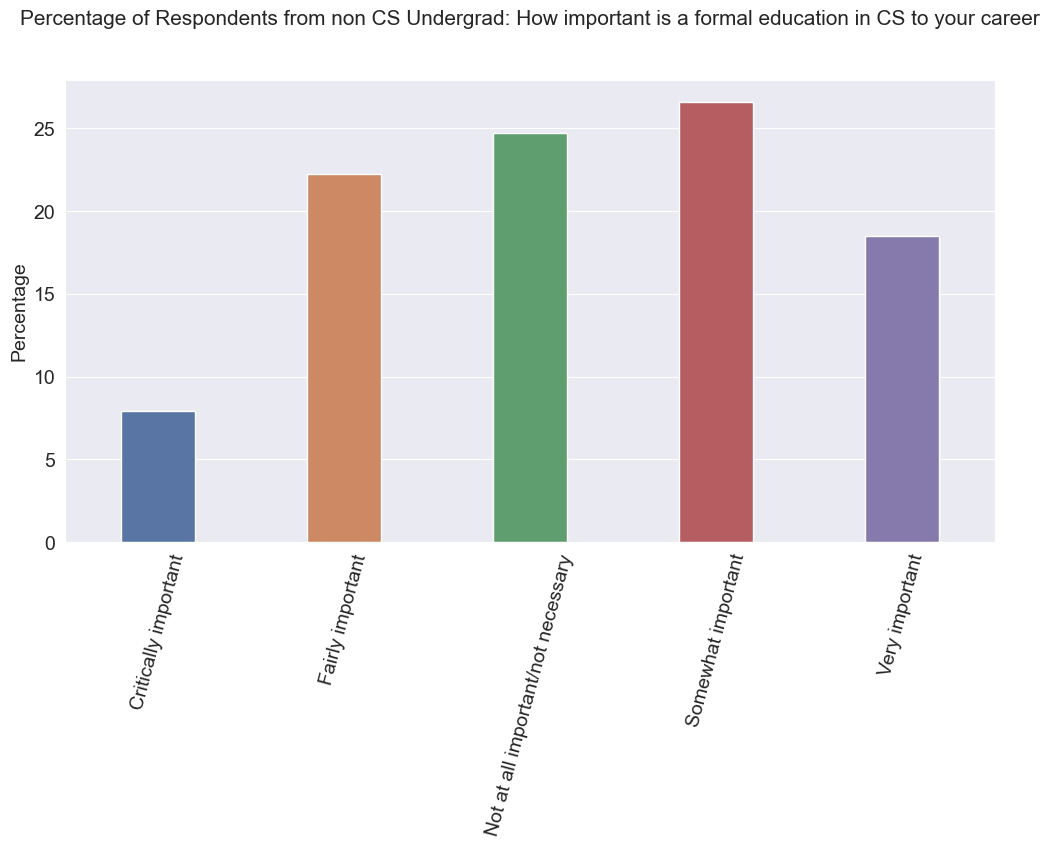

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Critically important','Fairly important','Not at all important/not necessary','Somewhat important','Very important'],
           y=list(nonCS_NEWEdImpt_percent.NEWEdImpt),width=0.4,palette='deep')
plt.xticks(rotation=75)
plt.title("Percentage of Respondents from non CS Undergrad: How important is a formal education in CS to your career",fontsize=15,pad=40)
plt.ylabel('Percentage');

### Approximately 25% of people with an undergraduate degree in a non-CS field believe that a formal education in computer science is not necessary for a career in the CS field. Additionally, over 25% feel that it is only somewhat important, indicating that many have developed programming skills despite their formal education being in a different field.

&nbsp;
## Employment 

In [82]:
schema_df.Employment

'Which of the following best describes your current employment status?'

In [83]:
survey_df.Employment.value_counts()

Employment
Employed full-time                                      43637
Student                                                  7495
Independent contractor, freelancer, or self-employed     5412
Not employed, but looking for work                       2218
Employed part-time                                       2124
Not employed, and not looking for work                    297
Retired                                                   233
Name: count, dtype: int64

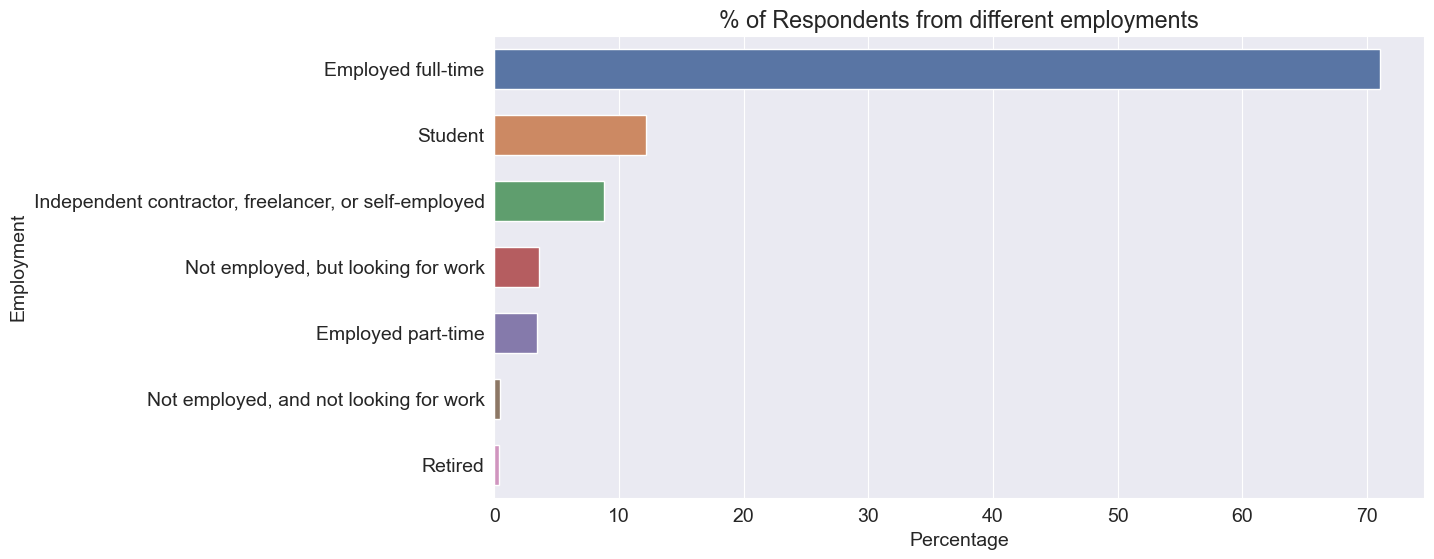

In [84]:
plt.figure(figsize=(12,6))
sns.barplot(y=survey_df.Employment.value_counts().index,
            x=survey_df.Employment.value_counts()*100/survey_df.Employment.value_counts().sum(),width=0.6,palette='deep')
plt.xlabel('Percentage')
plt.title('% of Respondents from different employments');

In [86]:
def categorise_employment(x):
    if x=='Student' or x=='Not employed, but looking for work':
        return 'Enthusiast'
    if x=='Employed full-time' or x=='Independent contractor, freelancer, or self-employed':
        return 'Professional'
    if x=='Retired' or x=='Not employed, and not looking for work':
        return 'Other'
    if x==np.nan:
        return np.nan

In [87]:
survey_df['EmploymentType']=survey_df['Employment'].apply(categorise_employment)

In [88]:
survey_df.EmploymentType.value_counts()

EmploymentType
Professional    49049
Enthusiast       9713
Other             530
Name: count, dtype: int64

In [89]:
schema_df.DevType

'Which of the following describe you? Please select all that apply.'

In [90]:
survey_df.DevType.value_counts()

DevType
Developer, full-stack                                                                                                                                                                                                                      4328
Developer, back-end                                                                                                                                                                                                                        2929
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                             2150
Developer, back-end;Developer, full-stack                                                                                                                                                                                                  1434
Developer, front-end            

&ensp; 
### Analyzing the Developer type is challenging because respondents could select multiple options. To simplify this, in the next few steps, I've created a new dataframe where each column represents a possible option from the survey. The values are in boolean form for each respondent: 'True' if they selected that particular role, and 'False' if they did not.
&ensp;

In [406]:
def dev_columns(x):
    columns=[]
    for i in list(x):
        if type(i)==str:
            list1=i.split(';')
            for j in list1:
                if j not in columns:
                    columns.append(j)
    return columns

### A function was created that takes a series with multiple options selected, separated by semicolons (';'), and returns a list of all unique options that respondents could choose from. This helps in identifying distinct choices within the data, allowing for clearer analysis of the selected options across the dataset.
&nbsp;

In [408]:
dev_columns(survey_df.DevType)

['Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Designer',
 'Developer, front-end',
 'Developer, mobile',
 'Developer, back-end',
 'Developer, embedded applications or devices',
 'Developer, QA or test',
 'Educator',
 'DevOps specialist',
 'Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Engineer, data',
 'Scientist',
 'Engineer, site reliability',
 'Engineering manager',
 'System administrator',
 'Developer, game or graphics',
 'Senior executive/VP',
 'Product manager',
 'Marketing or sales professional']

In [94]:
# Created a dataframe for Developer options and initialised all the values to 'False'

dev_type_df=pd.DataFrame(data=False,index=survey_df.DevType[survey_df.DevType.notna()].index,columns=dev_columns(survey_df.DevType))

In [95]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack",Designer,"Developer, front-end","Developer, mobile","Developer, back-end","Developer, embedded applications or devices","Developer, QA or test",Educator,DevOps specialist,...,Database administrator,"Engineer, data",Scientist,"Engineer, site reliability",Engineering manager,System administrator,"Developer, game or graphics",Senior executive/VP,Product manager,Marketing or sales professional
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61776,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61777,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
for i,value in survey_df.DevType[survey_df.DevType.notna()].items():
    list1=value.split(';')
    for j in list1:
        dev_type_df.at[i,j]=True

In [98]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack",Designer,"Developer, front-end","Developer, mobile","Developer, back-end","Developer, embedded applications or devices","Developer, QA or test",Educator,DevOps specialist,...,Database administrator,"Engineer, data",Scientist,"Engineer, site reliability",Engineering manager,System administrator,"Developer, game or graphics",Senior executive/VP,Product manager,Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61776,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
61777,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61779,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
61780,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
dev_type_percent=dev_type_df.sum()*100/dev_type_df.sum().sum()
dev_type_percent

Developer, desktop or enterprise applications     7.482523
Developer, full-stack                            17.345668
Designer                                          3.421692
Developer, front-end                             11.667886
Developer, mobile                                 6.009211
Developer, back-end                              17.279778
Developer, embedded applications or devices       3.016466
Developer, QA or test                             2.519652
Educator                                          1.848228
DevOps specialist                                 3.807811
Academic researcher                               2.248183
Data or business analyst                          2.559845
Data scientist or machine learning specialist     2.530194
Database administrator                            3.641767
Engineer, data                                    2.376669
Scientist                                         1.327693
Engineer, site reliability                        1.2466

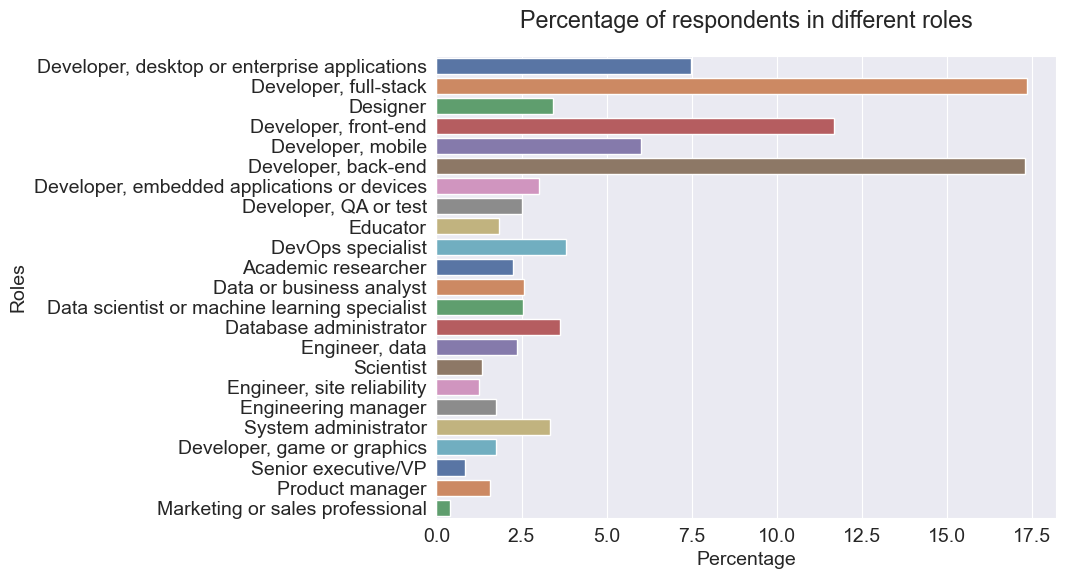

In [101]:
plt.figure(figsize=(8,6))
sns.barplot(y=dev_type_percent.index,x=dev_type_percent,width=0.8,palette='deep')
plt.title('Percentage of respondents in different roles',pad=20)
plt.xlabel('Percentage')
plt.ylabel('Roles');

In [102]:
gender_roles_merge=survey_df.merge(dev_type_df,how='outer',left_index=True,right_index=True).groupby('Gender')[dev_columns(survey_df.DevType)].sum()
gender_roles_merge

,"Developer, desktop or enterprise applications","Developer, full-stack",Designer,"Developer, front-end","Developer, mobile","Developer, back-end","Developer, embedded applications or devices","Developer, QA or test",Educator,DevOps specialist,...,Database administrator,"Engineer, data",Scientist,"Engineer, site reliability",Engineering manager,System administrator,"Developer, game or graphics",Senior executive/VP,Product manager,Marketing or sales professional
Gender,,,,,,,,,,,,,,,,,,,,,
Man,9475,21545,4040,14190,7383,21570,3743,3061,2246,4965,...,4600,2897,1606,1583,2208,4312,2177,1022,1983,442
"Non-binary, genderqueer, or gender non-conforming",62,157,42,107,41,159,27,28,22,44,...,36,18,18,20,14,48,33,7,8,7
Woman,422,1445,330,1168,444,1290,150,244,176,150,...,216,184,116,59,97,133,102,45,108,60


In [103]:
for i in dev_columns(survey_df.DevType):
    gender_roles_merge[i]=gender_roles_merge[i]*100/gender_roles_merge[i].sum()

In [104]:
gender_roles_merge

,"Developer, desktop or enterprise applications","Developer, full-stack",Designer,"Developer, front-end","Developer, mobile","Developer, back-end","Developer, embedded applications or devices","Developer, QA or test",Educator,DevOps specialist,...,Database administrator,"Engineer, data",Scientist,"Engineer, site reliability",Engineering manager,System administrator,"Developer, game or graphics",Senior executive/VP,Product manager,Marketing or sales professional
Gender,,,,,,,,,,,,,,,,,,,,,
Man,95.140074,93.079017,91.56845,91.755577,93.835791,93.7052,95.484694,91.839184,91.898527,96.239581,...,94.806265,93.481768,92.298851,95.246691,95.213454,95.971511,94.1609,95.158287,94.473559,86.836935
"Non-binary, genderqueer, or gender non-conforming",0.622552,0.678274,0.951949,0.691885,0.521098,0.690734,0.688776,0.840084,0.900164,0.852878,...,0.741962,0.580833,1.034483,1.203369,0.603708,1.068329,1.427336,0.651769,0.381134,1.375246
Woman,4.237373,6.24271,7.479601,7.552538,5.643111,5.604066,3.826531,7.320732,7.201309,2.90754,...,4.451772,5.937399,6.666667,3.54994,4.182837,2.96016,4.411765,4.189944,5.145307,11.787819


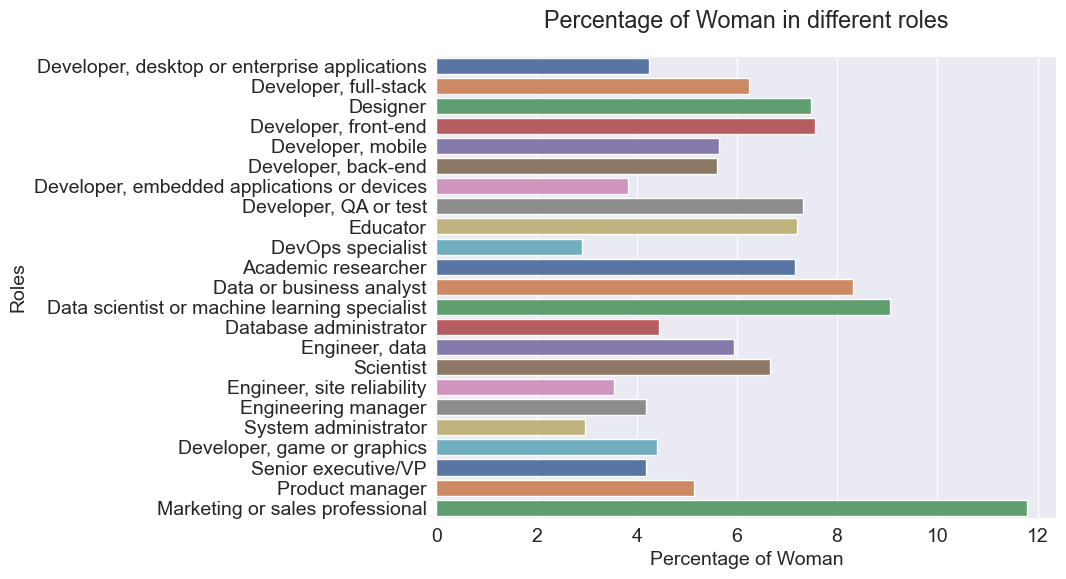

In [105]:
plt.figure(figsize=(8,6))
sns.barplot(y=gender_roles_merge.columns,x=gender_roles_merge.loc['Woman',:],palette='deep')
plt.title('Percentage of Woman in different roles',pad=20)
plt.xlabel('Percentage of Woman')
plt.ylabel('Roles');

&nbsp;
## Age when wrote the first code

In [107]:
schema_df.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [108]:
age_first_code=survey_df.Age1stCode.value_counts()
age_first_code

Age1stCode
15.0    5399
16.0    5304
14.0    5279
18.0    5235
12.0    4910
13.0    4010
17.0    3870
10.0    3320
19.0    3026
20.0    2361
11.0    2271
8.0     1576
21.0    1194
9.0     1192
22.0     977
7.0      939
23.0     687
25.0     616
24.0     559
6.0      542
5.0      360
26.0     324
27.0     248
28.0     239
30.0     228
29.0     162
32.0     104
31.0      86
35.0      84
33.0      77
34.0      46
40.0      38
38.0      31
37.0      31
36.0      27
39.0      26
45.0      20
50.0      17
42.0      15
44.0      13
43.0      11
41.0      10
47.0       8
49.0       7
54.0       7
55.0       6
46.0       6
53.0       4
48.0       4
85.0       4
51.0       3
58.0       3
64.0       2
52.0       2
73.0       2
56.0       2
72.0       1
68.0       1
76.0       1
83.0       1
Name: count, dtype: int64

In [109]:
age_first_code[(age_first_code.index<=12)].sum()

15110

In [110]:
age_first_code[(age_first_code.index>12)&(age_first_code.index<=18)].sum()

29097

In [111]:
age_first_code[(age_first_code.index>18)&(age_first_code.index<=24)].sum()

8804

In [112]:
age_first_code[(age_first_code.index>24)].sum()

2517

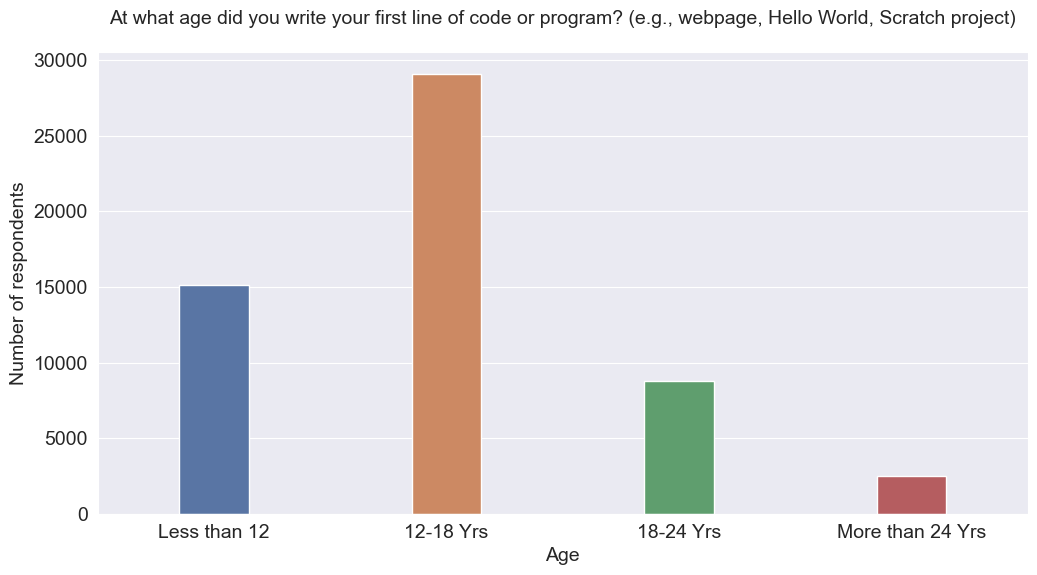

In [113]:
plt.figure(figsize=(12,6))
sns.barplot(x=['Less than 12','12-18 Yrs','18-24 Yrs','More than 24 Yrs'],
           y=[age_first_code[(age_first_code.index<=12)].sum(),
              age_first_code[(age_first_code.index>12)&(age_first_code.index<=18)].sum(),
             age_first_code[(age_first_code.index>18)&(age_first_code.index<=24)].sum(),
             age_first_code[(age_first_code.index>24)].sum()],width=0.3,palette='deep')
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.title(schema_df.Age1stCode,pad=20,size=14);

### The majority of respondents wrote their first code between the ages of 12 and 18, indicating that many people begin learning to code during their high school years. This early exposure to coding suggests that high school is a critical period for developing programming skills, potentially influencing future career paths in technology and computer science. 
&nbsp;

## Languages worked with

In [116]:
schema_df.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [117]:
survey_df.LanguageWorkedWith.value_counts()

LanguageWorkedWith
HTML/CSS;JavaScript;PHP;SQL                                  1046
HTML/CSS;JavaScript                                           880
C#;HTML/CSS;JavaScript;SQL                                    831
C#;HTML/CSS;JavaScript;SQL;TypeScript                         734
HTML/CSS;JavaScript;TypeScript                                668
                                                             ... 
Bash/Shell/PowerShell;HTML/CSS;Java;Perl;Python;SQL;Swift       1
Assembly;C;C++;HTML/CSS;Python;R;Swift                          1
Assembly;C#;SQL                                                 1
Bash/Shell/PowerShell;C++;HTML/CSS;PHP;Python                   1
HTML/CSS;JavaScript;PHP;Python;R;Ruby;SQL;Swift                 1
Name: count, Length: 13911, dtype: int64

&nbsp;
### Similar to the Developer type column, respondents could choose multiple options for programming languages. Therefore, the same procedure was applied: a new dataframe was created where each column represents a possible programming language from the survey, with boolean values indicating whether each respondent selected that language ('True') or not ('False').
&nbsp;

In [119]:
dev_columns(survey_df.LanguageWorkedWith)

['C#',
 'HTML/CSS',
 'JavaScript',
 'Java',
 'Bash/Shell/PowerShell',
 'C++',
 'Kotlin',
 'PHP',
 'SQL',
 'TypeScript',
 'Python',
 'Go',
 'Ruby',
 'C',
 'Assembly',
 'Rust',
 'R',
 'Dart',
 'Perl',
 'Scala',
 'VBA',
 'Objective-C',
 'Swift',
 'Haskell',
 'Julia']

In [120]:
programming_languages_df=pd.DataFrame(data=False,columns=dev_columns(survey_df.LanguageWorkedWith),
                                      index=survey_df[survey_df.LanguageWorkedWith.notna()].index)
programming_languages_df

,C#,HTML/CSS,JavaScript,Java,Bash/Shell/PowerShell,C++,Kotlin,PHP,SQL,TypeScript,...,Rust,R,Dart,Perl,Scala,VBA,Objective-C,Swift,Haskell,Julia
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61782,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [121]:
for i,languages in survey_df.LanguageWorkedWith[survey_df.LanguageWorkedWith.notna()].items():
    languages_list=languages.split(';')
    for j in languages_list:
        programming_languages_df.at[i,j]=True

In [123]:
programming_languages_percentage=programming_languages_df.sum().sort_values(ascending=False)*100/programming_languages_df.sum().sum()
programming_languages_percentage

JavaScript               13.498056
HTML/CSS                 12.595098
SQL                      10.913047
Python                    8.783646
Java                      8.022504
Bash/Shell/PowerShell     6.607930
C#                        6.252132
PHP                       5.215615
TypeScript                5.064823
C++                       4.729849
C                         4.326659
Go                        1.743445
Kotlin                    1.531977
Ruby                      1.406317
Assembly                  1.230393
VBA                       1.216031
Swift                     1.169358
R                         1.148175
Rust                      1.010308
Objective-C               0.806379
Dart                      0.790582
Scala                     0.709800
Perl                      0.623992
Haskell                   0.424372
Julia                     0.179515
dtype: float64

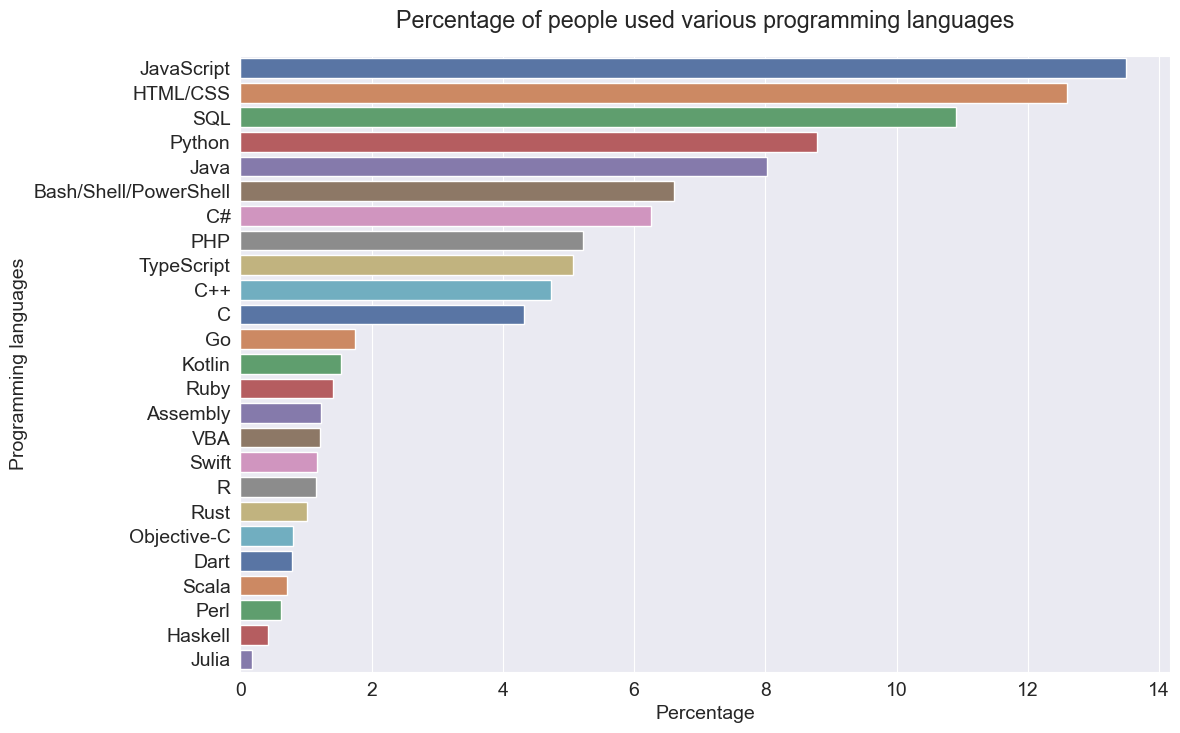

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(y=programming_languages_percentage.index,x=programming_languages_percentage,palette='deep')
plt.title('Percentage of people used various programming languages',pad=20)
plt.xlabel('Percentage')
plt.ylabel('Programming languages');

### The graph clearly shows that the most popular programming languages among respondents are JavaScript, HTML/CSS, SQL, and Python, among others. This popularity reflects current industry trends and the widespread use of these languages in various domains such as web development, data analysis, and database management. 
&nbsp;

In [126]:
employment_languages=survey_df.merge(programming_languages_df,how='outer',left_index=True,right_index=True).groupby('Employment')[dev_columns(survey_df.LanguageWorkedWith)].sum()
employment_languages

,C#,HTML/CSS,JavaScript,Java,Bash/Shell/PowerShell,C++,Kotlin,PHP,SQL,TypeScript,...,Rust,R,Dart,Perl,Scala,VBA,Objective-C,Swift,Haskell,Julia
Employment,,,,,,,,,,,,,,,,,,,,,
Employed full-time,12808,24035,27046,14978,13600,7597,3014,9524,22175,11077,...,1734,2063,1279,1285,1556,2436,1661,2251,615,289
Employed part-time,622,1251,1242,915,623,602,166,633,1035,427,...,149,167,107,59,51,107,47,114,89,28
"Independent contractor, freelancer, or self-employed",1481,3485,3690,1664,1602,1060,387,1806,2892,1310,...,223,248,300,202,166,363,299,399,106,41
"Not employed, and not looking for work",63,146,142,103,71,72,21,65,104,42,...,20,14,11,13,3,16,6,14,10,2
"Not employed, but looking for work",476,1376,1283,791,433,566,118,572,1012,322,...,105,109,80,36,30,103,51,88,33,17
Retired,41,90,89,53,57,54,12,43,89,18,...,4,16,6,25,4,47,16,23,6,9
Student,1847,4534,3950,3733,1946,3150,526,1800,2978,871,...,563,567,403,105,163,294,155,351,315,104


In [127]:
student_languages_percent=employment_languages.loc['Student',:]*100/employment_languages.loc['Student',:].sum()
student_languages_percent=student_languages_percent.sort_values(ascending=False)
student_languages_percent

HTML/CSS                 12.093247
Python                   11.394431
JavaScript               10.535581
Java                      9.956791
C++                       8.401792
C                         8.244425
SQL                       7.943028
Bash/Shell/PowerShell     5.190441
C#                        4.926384
PHP                       4.801024
Assembly                  2.712579
TypeScript                2.323162
R                         1.512323
Rust                      1.501654
Kotlin                    1.402966
Go                        1.221594
Dart                      1.074896
Swift                       0.9362
Haskell                   0.840179
Ruby                      0.797503
VBA                       0.784167
Scala                     0.434759
Objective-C               0.413422
Perl                       0.28006
Julia                     0.277393
Name: Student, dtype: object

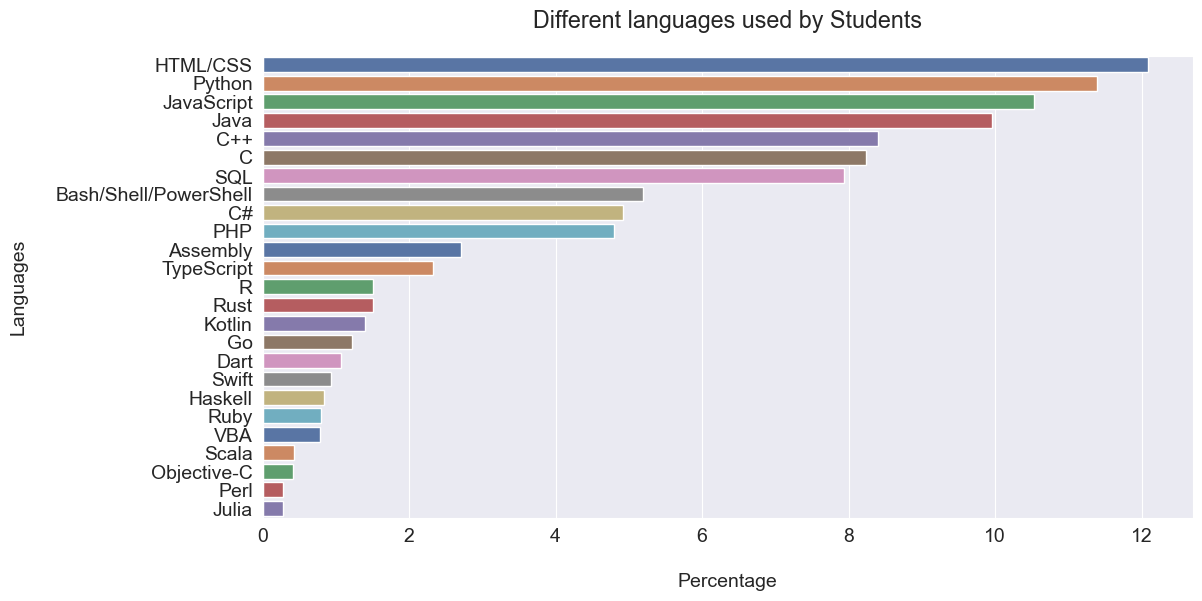

In [128]:
plt.figure(figsize=(12,6))
sns.barplot(y=student_languages_percent.index,x=student_languages_percent,palette='deep')
plt.title('Different languages used by Students',pad=20)
plt.xlabel('Percentage',labelpad=20)
plt.ylabel('Languages',labelpad=20);

In [129]:
professionals_languages=survey_df.merge(programming_languages_df,how='outer',left_index=True,right_index=True).groupby('EmploymentType')[dev_columns(survey_df.LanguageWorkedWith)].sum()
professionals_languages

,C#,HTML/CSS,JavaScript,Java,Bash/Shell/PowerShell,C++,Kotlin,PHP,SQL,TypeScript,...,Rust,R,Dart,Perl,Scala,VBA,Objective-C,Swift,Haskell,Julia
EmploymentType,,,,,,,,,,,,,,,,,,,,,
Enthusiast,2323,5910,5233,4524,2379,3716,644,2372,3990,1193,...,668,676,483,141,193,397,206,439,348,121
Other,104,236,231,156,128,126,33,108,193,60,...,24,30,17,38,7,63,22,37,16,11
Professional,14289,27520,30736,16642,15202,8657,3401,11330,25067,12387,...,1957,2311,1579,1487,1722,2799,1960,2650,721,330


In [130]:
professsionals_languages_percent=(professionals_languages.loc['Professional',:]*100/professionals_languages.loc['Professional',:].sum()).sort_values(ascending=False)
professsionals_languages_percent

JavaScript               14.110928
HTML/CSS                 12.634459
SQL                      11.508284
Python                     8.26244
Java                      7.640359
Bash/Shell/PowerShell     6.979253
C#                        6.560094
TypeScript                5.686884
PHP                       5.201614
C++                       3.974437
C                         3.529109
Go                        1.883691
Kotlin                    1.561402
Ruby                      1.515951
VBA                       1.285024
Swift                     1.216618
R                         1.060982
Assembly                  0.909479
Objective-C               0.899838
Rust                      0.898461
Scala                     0.790572
Dart                       0.72492
Perl                      0.682683
Haskell                   0.331012
Julia                     0.151503
Name: Professional, dtype: object

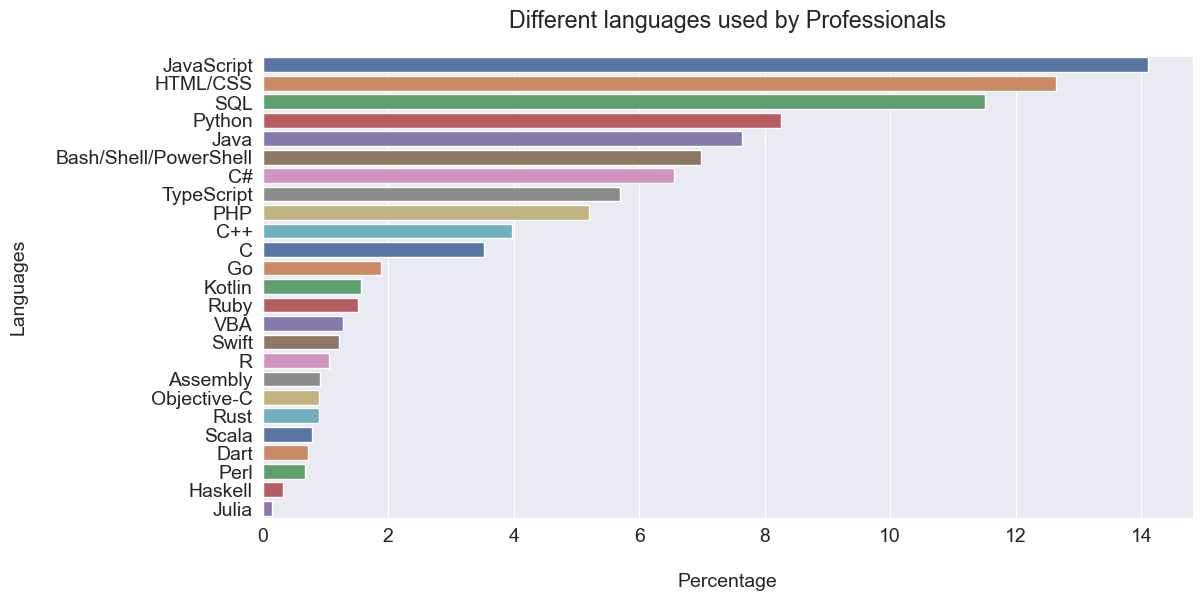

In [131]:
plt.figure(figsize=(12,6))
sns.barplot(y=professsionals_languages_percent.index,x=professsionals_languages_percent,palette='deep')
plt.title('Different languages used by Professionals',pad=20)
plt.xlabel('Percentage',labelpad=20)
plt.ylabel('Languages',labelpad=20);

In [132]:
agegroup_languages=survey_df.merge(programming_languages_df,how='outer',right_index=True,left_index=True).groupby('AgeGroup')[dev_columns(survey_df.LanguageWorkedWith)].sum()
agegroup_languages

,C#,HTML/CSS,JavaScript,Java,Bash/Shell/PowerShell,C++,Kotlin,PHP,SQL,TypeScript,...,Rust,R,Dart,Perl,Scala,VBA,Objective-C,Swift,Haskell,Julia
AgeGroup,,,,,,,,,,,,,,,,,,,,,
10-18 years,352,779,677,501,308,443,91,255,321,142,...,116,24,64,6,8,35,23,88,25,10
18-30 years,6570,14466,15255,9848,6926,5908,1965,6037,11961,5975,...,1310,1363,1075,377,733,1054,754,1253,592,194
30-45 years,5582,10323,11647,5691,6444,2710,1187,4054,9595,4779,...,774,918,429,602,749,1056,760,949,241,118
45-60 years,1174,1877,2014,1042,1384,729,157,702,2000,552,...,103,179,84,282,93,358,166,227,37,33
Older than 60 years,178,271,284,153,212,175,20,128,329,55,...,13,41,12,72,14,101,28,36,15,8


In [133]:
for i in agegroup_languages.index:
    agegroup_languages.loc[i,:]=agegroup_languages.loc[i,:]*100/agegroup_languages.loc[i,:].sum()

In [134]:
agegroup_languages

,C#,HTML/CSS,JavaScript,Java,Bash/Shell/PowerShell,C++,Kotlin,PHP,SQL,TypeScript,...,Rust,R,Dart,Perl,Scala,VBA,Objective-C,Swift,Haskell,Julia
AgeGroup,,,,,,,,,,,,,,,,,,,,,
10-18 years,6.343485,14.038566,12.200396,9.028654,5.55055,7.98342,1.639935,4.595423,5.784826,2.55902,...,2.090467,0.43251,1.153361,0.108128,0.14417,0.630744,0.414489,1.585871,0.450532,0.180213
18-30 years,5.732834,12.622706,13.31117,8.593143,6.043472,5.155188,1.714615,5.26775,10.4369,5.213651,...,1.143077,1.189323,0.938021,0.328962,0.639599,0.919697,0.657923,1.09334,0.516566,0.16928
30-45 years,6.870238,12.705387,14.334946,7.004394,7.931175,3.335426,1.460941,4.9896,11.809376,5.881919,...,0.952627,1.12986,0.528006,0.740932,0.921857,1.299708,0.935396,1.168014,0.296619,0.145233
45-60 years,7.406473,11.841524,12.705823,6.573718,8.73131,4.599079,0.990474,4.428743,12.6175,3.48243,...,0.649801,1.129266,0.529935,1.779068,0.586714,2.258533,1.047253,1.432086,0.233424,0.208189
Older than 60 years,6.679174,10.168856,10.65666,5.741088,7.954972,6.566604,0.750469,4.803002,12.345216,2.06379,...,0.487805,1.538462,0.450281,2.701689,0.525328,3.789869,1.050657,1.350844,0.562852,0.300188


In [135]:
agegroup_languages.reset_index(drop=False,inplace=True)

In [136]:
agegroup_languages

,AgeGroup,C#,HTML/CSS,JavaScript,Java,Bash/Shell/PowerShell,C++,Kotlin,PHP,SQL,...,Rust,R,Dart,Perl,Scala,VBA,Objective-C,Swift,Haskell,Julia
0,10-18 years,6.343485,14.038566,12.200396,9.028654,5.55055,7.98342,1.639935,4.595423,5.784826,...,2.090467,0.43251,1.153361,0.108128,0.14417,0.630744,0.414489,1.585871,0.450532,0.180213
1,18-30 years,5.732834,12.622706,13.31117,8.593143,6.043472,5.155188,1.714615,5.26775,10.4369,...,1.143077,1.189323,0.938021,0.328962,0.639599,0.919697,0.657923,1.09334,0.516566,0.16928
2,30-45 years,6.870238,12.705387,14.334946,7.004394,7.931175,3.335426,1.460941,4.9896,11.809376,...,0.952627,1.12986,0.528006,0.740932,0.921857,1.299708,0.935396,1.168014,0.296619,0.145233
3,45-60 years,7.406473,11.841524,12.705823,6.573718,8.73131,4.599079,0.990474,4.428743,12.6175,...,0.649801,1.129266,0.529935,1.779068,0.586714,2.258533,1.047253,1.432086,0.233424,0.208189
4,Older than 60 years,6.679174,10.168856,10.65666,5.741088,7.954972,6.566604,0.750469,4.803002,12.345216,...,0.487805,1.538462,0.450281,2.701689,0.525328,3.789869,1.050657,1.350844,0.562852,0.300188


In [137]:
agegroup_languages_longer=pd.melt(agegroup_languages,id_vars='AgeGroup',var_name='languages',value_name='percentage')
agegroup_languages_longer

,AgeGroup,languages,percentage
0,10-18 years,C#,6.343485
1,18-30 years,C#,5.732834
2,30-45 years,C#,6.870238
3,45-60 years,C#,7.406473
4,Older than 60 years,C#,6.679174
...,...,...,...
120,10-18 years,Julia,0.180213
121,18-30 years,Julia,0.16928
122,30-45 years,Julia,0.145233
123,45-60 years,Julia,0.208189


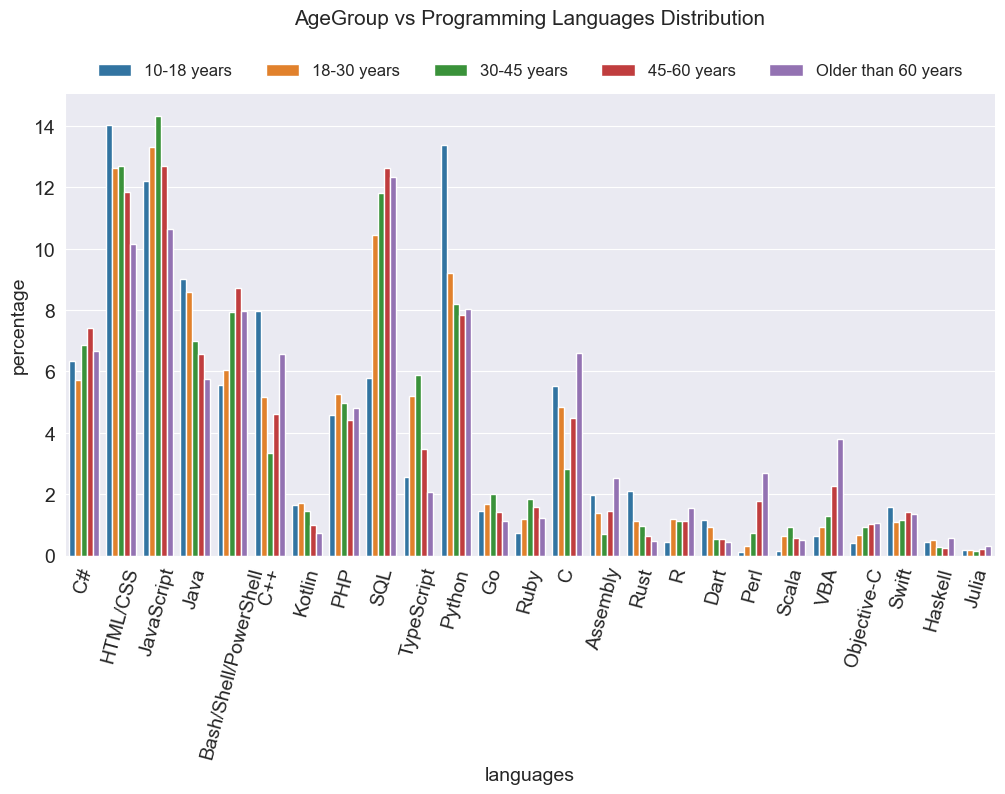

In [138]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='percentage', x='languages', hue='AgeGroup', data=agegroup_languages_longer)
plt.title('AgeGroup vs Programming Languages Distribution',pad=50,size=15)
ax.spines[['top', 'right']].set_visible(False)
sns.move_legend(ax, bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False, loc='lower center',fontsize=12)
plt.xticks(rotation=75);


&nbsp;
## Desired Languages to learn

In [140]:
schema_df.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [141]:
survey_df.LanguageDesireNextYear.value_counts()

LanguageDesireNextYear
Python                                                                  1115
Rust                                                                     498
HTML/CSS;JavaScript;TypeScript                                           477
C#                                                                       437
HTML/CSS;JavaScript                                                      405
                                                                        ... 
Dart;HTML/CSS;Java;JavaScript;Objective-C;PHP;Python;SQL                   1
Go;HTML/CSS;JavaScript;Kotlin;PHP;Python;SQL;Swift                         1
Bash/Shell/PowerShell;C++;HTML/CSS;Java;JavaScript;PHP;Python;R;SQL        1
Bash/Shell/PowerShell;C;Go;HTML/CSS;JavaScript;Rust;SQL;TypeScript         1
Bash/Shell/PowerShell;C#;C++;HTML/CSS;Java;JavaScript;Python;R;Swift       1
Name: count, Length: 15832, dtype: int64

In [142]:
dev_columns(survey_df.LanguageDesireNextYear)

['C#',
 'HTML/CSS',
 'JavaScript',
 'Java',
 'C++',
 'Bash/Shell/PowerShell',
 'Go',
 'Julia',
 'Kotlin',
 'Python',
 'SQL',
 'TypeScript',
 'Perl',
 'Swift',
 'VBA',
 'Ruby',
 'Rust',
 'C',
 'R',
 'Scala',
 'Dart',
 'PHP',
 'Haskell',
 'Objective-C',
 'Assembly']

In [143]:
desired_languages_df=pd.DataFrame(data=False,columns=dev_columns(survey_df.LanguageDesireNextYear),
                               index=survey_df.LanguageDesireNextYear[survey_df.LanguageDesireNextYear.notna()].index)

In [144]:
desired_languages_df

,C#,HTML/CSS,JavaScript,Java,C++,Bash/Shell/PowerShell,Go,Julia,Kotlin,Python,...,Ruby,Rust,C,R,Scala,Dart,PHP,Haskell,Objective-C,Assembly
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61782,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61783,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [145]:
for i,desired_languages in survey_df.LanguageDesireNextYear[survey_df.LanguageDesireNextYear.notna()].items():
    desired_languages_list=desired_languages.split(';')
    for j in desired_languages_list:
        desired_languages_df.at[i,j]=True

In [146]:
desired_languages_df

,C#,HTML/CSS,JavaScript,Java,C++,Bash/Shell/PowerShell,Go,Julia,Kotlin,Python,...,Ruby,Rust,C,R,Scala,Dart,PHP,Haskell,Objective-C,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61779,False,True,True,False,False,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,False
61780,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
61782,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
61783,True,True,True,True,True,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [147]:
desired_languages_percent=(desired_languages_df.sum()*100/desired_languages_df.sum().sum()).sort_values(ascending=False)
desired_languages_percent

Python                   11.237585
JavaScript               11.021662
HTML/CSS                  8.755116
SQL                       8.396257
TypeScript                7.205853
C#                        5.731316
Java                      5.550583
Go                        5.274705
Bash/Shell/PowerShell     4.932356
Rust                      4.433168
C++                       4.066489
Kotlin                    3.982639
PHP                       2.987305
C                         2.547203
Swift                     2.352568
Dart                      1.981110
R                         1.808632
Ruby                      1.759104
Scala                     1.441084
Haskell                   1.245145
Assembly                  1.037042
Julia                     0.698602
Objective-C               0.631696
Perl                      0.480072
VBA                       0.442709
dtype: float64

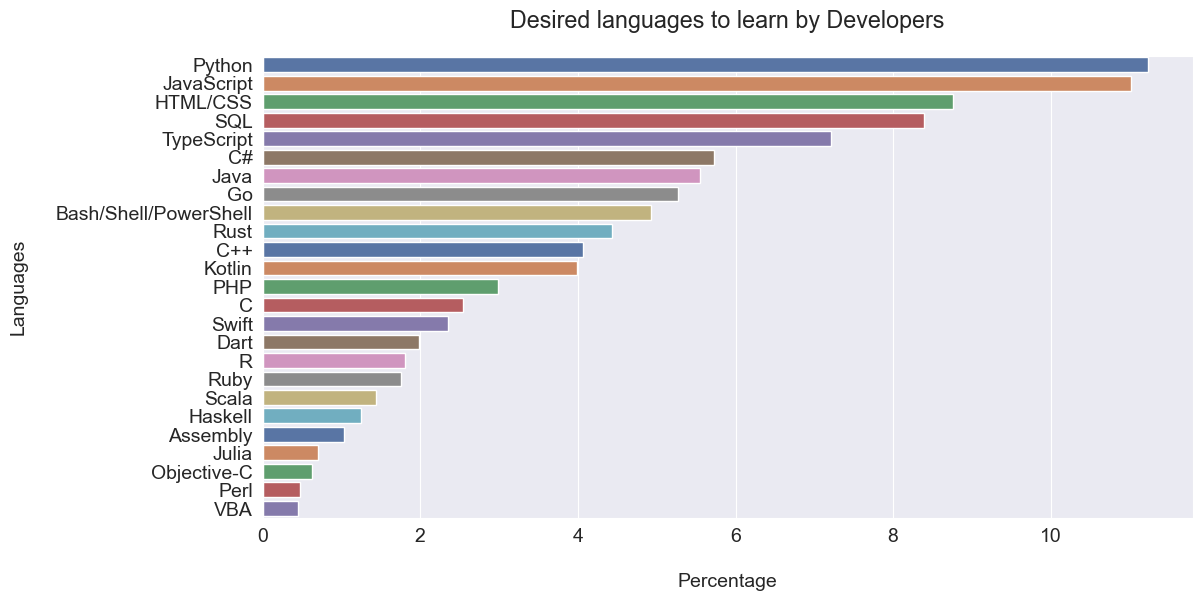

In [148]:
plt.figure(figsize=(12,6))
sns.barplot(y=desired_languages_percent.index,x=desired_languages_percent,palette='deep')
plt.title('Desired languages to learn by Developers',pad=20)
plt.xlabel('Percentage',labelpad=20)
plt.ylabel('Languages',labelpad=20);

### The graph indicates that Python is the top choice for programmers when it comes to desired languages to learn. Its popularity is largely due to its ease of use and versatility, making it suitable for a wide range of applications, from web development to data science and automation. Python's user-friendly syntax and extensive libraries make it an attractive option for both beginners and experienced developers looking to expand their skill set.
&nbsp;

In [150]:
most_loved_languages=((programming_languages_df & desired_languages_df).sum().sort_values(ascending=False)/(programming_languages_df.sum())*100).sort_values(ascending=False)
most_loved_languages

Rust                     86.140725
TypeScript               67.108528
Python                   66.777028
Kotlin                   62.690415
Go                       62.335255
Dart                     61.852861
Julia                    61.800000
C#                       59.647410
Swift                    59.471907
JavaScript               58.394510
SQL                      56.625872
Bash/Shell/PowerShell    53.729965
HTML/CSS                 53.567458
Scala                    52.554375
Haskell                  51.269036
R                        44.465291
Java                     44.005370
C++                      43.373311
Ruby                     42.609140
PHP                      37.220348
C                        33.042901
Assembly                 29.471841
Perl                     28.250863
Objective-C              23.018700
VBA                      19.545320
dtype: float64

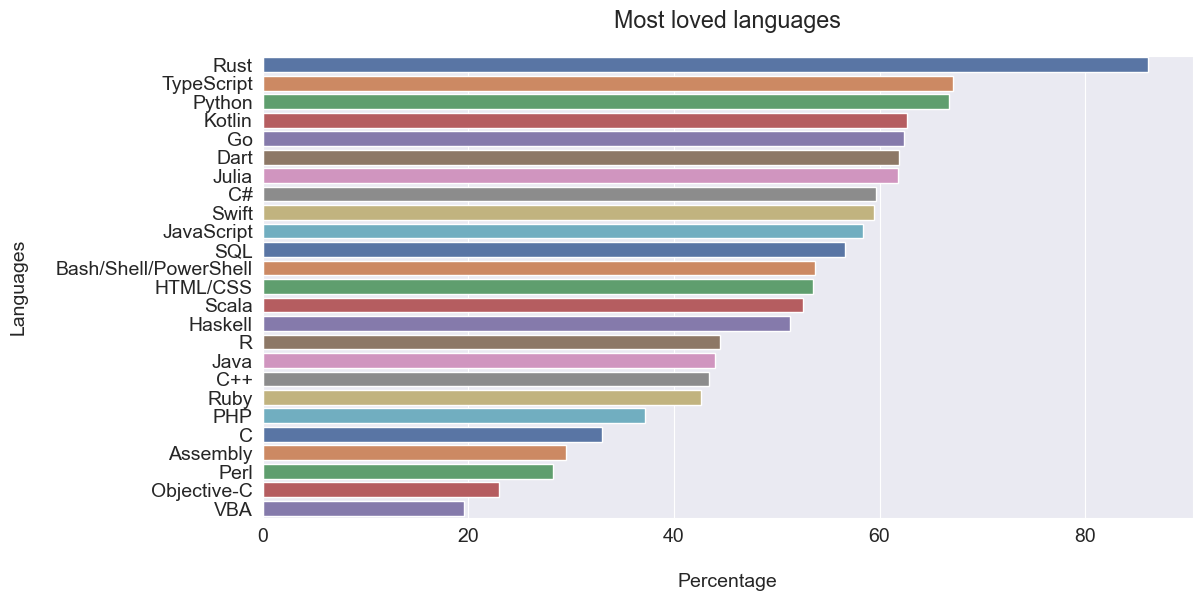

In [151]:
plt.figure(figsize=(12,6))
sns.barplot(y=most_loved_languages.index,x=most_loved_languages,palette='deep')
plt.title('Most loved languages',pad=20)
plt.xlabel('Percentage',labelpad=20)
plt.ylabel('Languages',labelpad=20);

### Most loved languages refer to those that developers use and are eager to continue learning over the next year. Rust tops this chart due to its emphasis on memory safety and performance without compromising productivity. Developers appreciate Rust's robust type system and the borrow checker, which prevent common bugs, making it particularly reliable for long-term projects. 
&nbsp;

## Hours work per week

In [154]:
schema_df.WorkWeekHrs

'On average, how many hours per week do you work? Please enter a whole number in the box.'

In [155]:
survey_df.WorkWeekHrs.value_counts()

WorkWeekHrs
40.0     18646
45.0      3722
50.0      2671
35.0      1954
38.0      1345
         ...  
38.4         1
108.0        1
73.0         1
40.5         1
45.5         1
Name: count, Length: 143, dtype: int64

In [156]:
dev_avg_hrs=pd.DataFrame()

In [157]:
# Avg number of hours work per week for different roles

for i in dev_columns(survey_df.DevType):
    dev_avg_hrs.at[i,'WorkWeekHrs']=((survey_df.merge(dev_type_df,how='outer',left_index=True,right_index=True)).groupby(i)[['WorkWeekHrs']].mean()).at[True,'WorkWeekHrs']

In [158]:
dev_avg_hrs

,WorkWeekHrs
"Developer, desktop or enterprise applications",40.522687
"Developer, full-stack",40.101449
Designer,40.495414
"Developer, front-end",39.802681
"Developer, mobile",40.234748
"Developer, back-end",40.034201
"Developer, embedded applications or devices",40.796894
"Developer, QA or test",40.788119
Educator,40.887552
DevOps specialist,41.355209


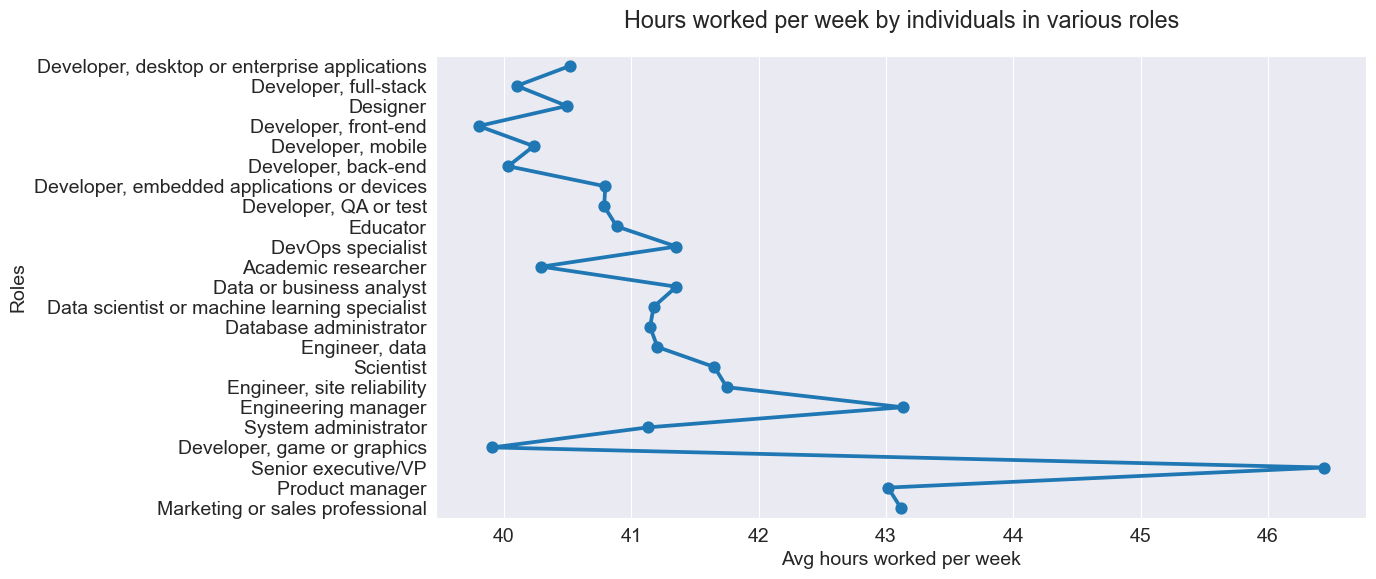

In [159]:
plt.figure(figsize=(12,6))
sns.pointplot(y=dev_avg_hrs.index,x=dev_avg_hrs.WorkWeekHrs)
plt.title('Hours worked per week by individuals in various roles',pad=20)
plt.ylabel('Roles')
plt.xlabel('Avg hours worked per week');

### The graph indicates that most people across corporate roles work an average of around 40 hours per week. However, roles like Senior Executive/VP show a higher average of about 46 hours per week. This is expected, as individuals in high-level positions typically have more responsibilities and therefore work longer hours than others. The additional time likely reflects the demands of leadership, decision-making, and overseeing broader organizational strategies.
&nbsp;

In [161]:
workhrs_avg_countries=survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values(by='WorkWeekHrs',ascending=False)

In [162]:
# Countries with more than 400 responses

top_responses_countries=survey_df.Country.value_counts()[survey_df.Country.value_counts()>400].index
top_responses_countries

Index(['United States', 'India', 'United Kingdom', 'Germany', 'Canada',
       'France', 'Brazil', 'Netherlands', 'Poland', 'Australia', 'Spain',
       'Italy', 'Sweden', 'Pakistan', 'Turkey', 'Israel', 'Switzerland',
       'Bangladesh', 'Romania', 'Nigeria', 'Mexico', 'Ukraine', 'Austria',
       'Indonesia', 'Czech Republic', 'South Africa', 'Iran', 'Belgium',
       'Ireland', 'Philippines'],
      dtype='object', name='Country')

In [163]:
workhrs_avg_top_countries=workhrs_avg_countries.loc[top_responses_countries,:]
workhrs_avg_top_countries

,WorkWeekHrs
Country,
United States,41.792403
India,40.099726
United Kingdom,38.939280
Germany,39.135799
Canada,40.199433
France,38.972099
Brazil,38.394071
Netherlands,39.091006
Poland,38.844408


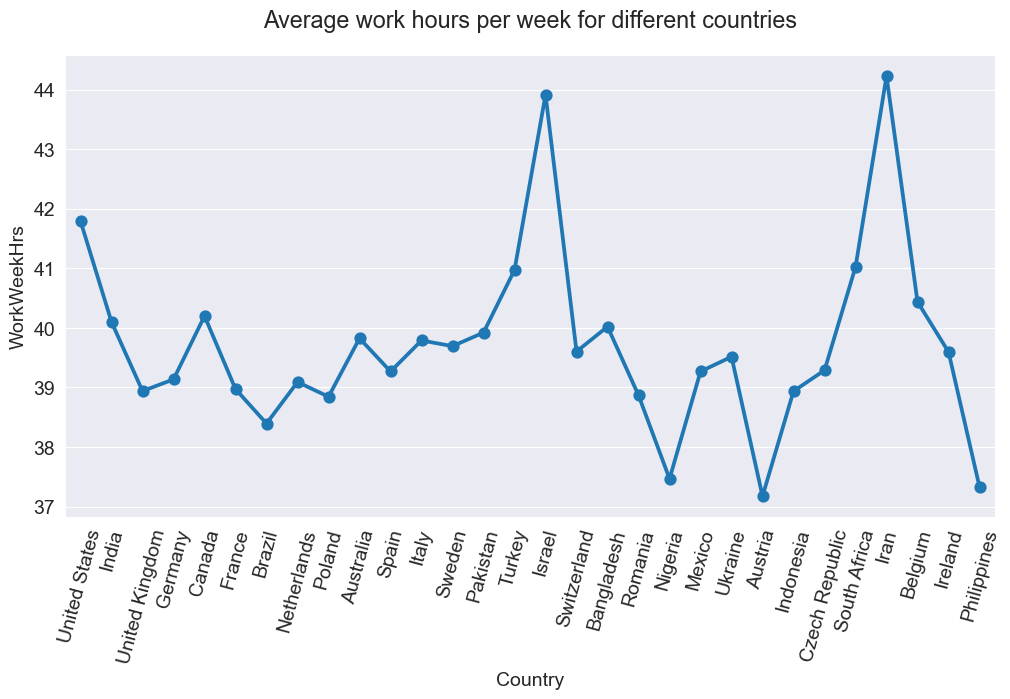

In [164]:
plt.figure(figsize=(12,6))
sns.pointplot(x=workhrs_avg_top_countries.index,y=workhrs_avg_top_countries.WorkWeekHrs)
plt.xticks(rotation=75)
plt.title('Average work hours per week for different countries',pad=20);

### The graph reveals that average work hours per week for respondents from various countries generally hover around the 40-hour mark. However, in some Asian countries, such as Iran and Israel, the average is slightly higher. Overall, the consistency near the 40-hour threshold across most regions is a positive indicator that people are not excessively overworked. This balance suggests that, on average, work-life equilibrium is being maintained, which is crucial for long-term productivity and well-being.
&nbsp;

## Job Satisfaction

In [167]:
schema_df.JobSat

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [168]:
countries_jobsat=survey_df.groupby('Country')[['JobSat']].value_counts()
countries_jobsat

Country      JobSat                            
Afghanistan  Slightly satisfied                    9
             Very satisfied                        8
             Very dissatisfied                     6
             Slightly dissatisfied                 5
             Neither satisfied nor dissatisfied    4
                                                  ..
Zimbabwe     Slightly satisfied                    5
             Very satisfied                        4
             Neither satisfied nor dissatisfied    3
             Slightly dissatisfied                 3
             Very dissatisfied                     3
Name: count, Length: 632, dtype: int64

In [169]:
top_four_countries=['United States', 'India', 'United Kingdom', 'Germany']

In [170]:
top_countries_jobsat=countries_jobsat[top_four_countries]
top_countries_jobsat

Country         JobSat                            
United States   Very satisfied                        4039
                Slightly satisfied                    2858
                Slightly dissatisfied                 1315
                Neither satisfied nor dissatisfied     905
                Very dissatisfied                      613
India           Slightly satisfied                    1566
                Very satisfied                        1165
                Neither satisfied nor dissatisfied    1030
                Slightly dissatisfied                  868
                Very dissatisfied                      414
United Kingdom  Very satisfied                        1160
                Slightly satisfied                     952
                Slightly dissatisfied                  467
                Neither satisfied nor dissatisfied     299
                Very dissatisfied                      228
Germany         Very satisfied                         979
     

In [171]:
for i in top_four_countries:
    top_countries_jobsat[i]=top_countries_jobsat[i]*100/top_countries_jobsat[i].sum()

In [172]:
top_countries_jobsat

Country         JobSat                            
United States   Very satisfied                        41.510791
                Slightly satisfied                    29.373073
                Slightly dissatisfied                 13.514902
                Neither satisfied nor dissatisfied     9.301131
                Very dissatisfied                      6.300103
India           Slightly satisfied                    31.052945
                Very satisfied                        23.101329
                Neither satisfied nor dissatisfied    20.424351
                Slightly dissatisfied                 17.211977
                Very dissatisfied                      8.209399
United Kingdom  Very satisfied                        37.347070
                Slightly satisfied                    30.650354
                Slightly dissatisfied                 15.035415
                Neither satisfied nor dissatisfied     9.626529
                Very dissatisfied                    

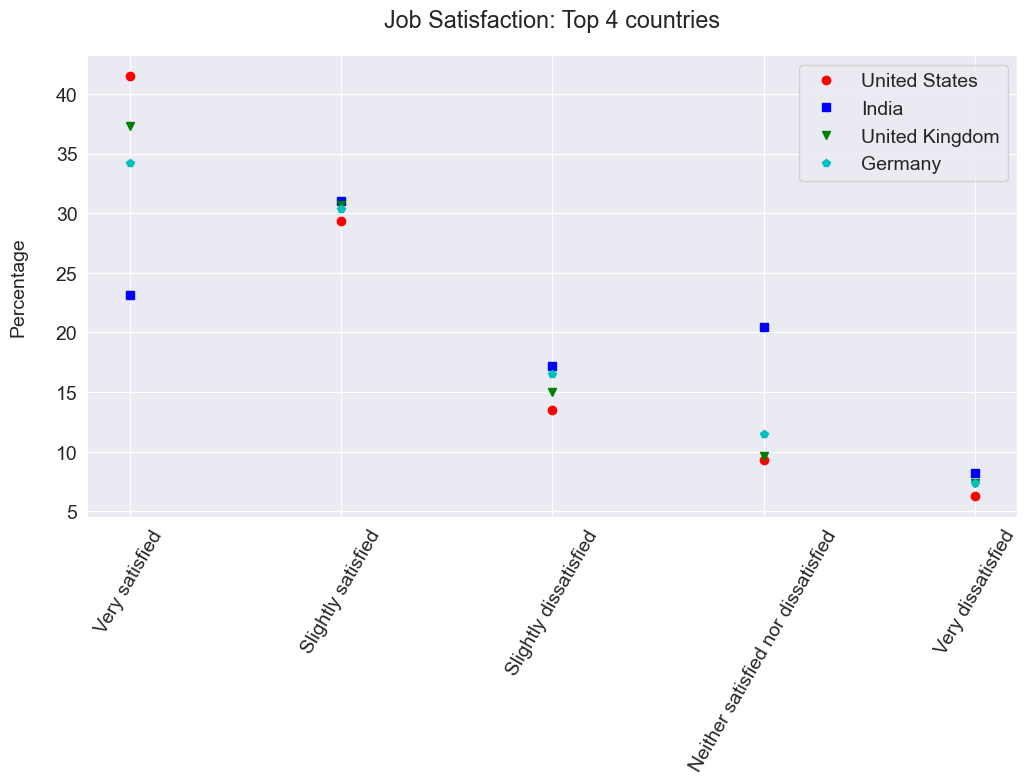

In [173]:
plt.figure(figsize=(12,6))
plt.plot(top_countries_jobsat['United States'],'or')
plt.plot(top_countries_jobsat['India'],'sb')
plt.plot(top_countries_jobsat['United Kingdom'],'vg')
plt.plot(top_countries_jobsat['Germany'],'pc')
plt.xticks(rotation=60);
plt.legend(['United States', 'India', 'United Kingdom', 'Germany'])
plt.title('Job Satisfaction: Top 4 countries',pad=20)
plt.ylabel('Percentage',labelpad=20);

### The graph suggests that around 65% of respondents from the top four countries with the highest participation are satisfied with their jobs, with about 33% reporting they are "very satisfied." Job satisfaction appears to be slightly higher in European countries and the U.S. compared to Asian countries like India. This disparity could reflect differences in work culture, opportunities, and economic conditions, with respondents in Europe and the U.S. generally reporting a greater sense of contentment in their professional lives.
&nbsp;

In [175]:
gender_jobsat=survey_df.groupby('Gender')['JobSat'].value_counts()
gender_jobsat

Gender                                             JobSat                            
Man                                                Very satisfied                        11434
                                                   Slightly satisfied                    10875
                                                   Slightly dissatisfied                  5571
                                                   Neither satisfied nor dissatisfied     4360
                                                   Very dissatisfied                      2874
Non-binary, genderqueer, or gender non-conforming  Very satisfied                          102
                                                   Slightly satisfied                       58
                                                   Slightly dissatisfied                    45
                                                   Neither satisfied nor dissatisfied       44
                                                   Very dis

In [176]:
for i in ['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']:
    gender_jobsat[i]=gender_jobsat[i]*100/gender_jobsat[i].sum()

In [177]:
gender_jobsat

Gender                                             JobSat                            
Man                                                Very satisfied                        32.562511
                                                   Slightly satisfied                    30.970553
                                                   Slightly dissatisfied                 15.865467
                                                   Neither satisfied nor dissatisfied    12.416700
                                                   Very dissatisfied                      8.184770
Non-binary, genderqueer, or gender non-conforming  Very satisfied                        37.362637
                                                   Slightly satisfied                    21.245421
                                                   Slightly dissatisfied                 16.483516
                                                   Neither satisfied nor dissatisfied    16.117216
                       

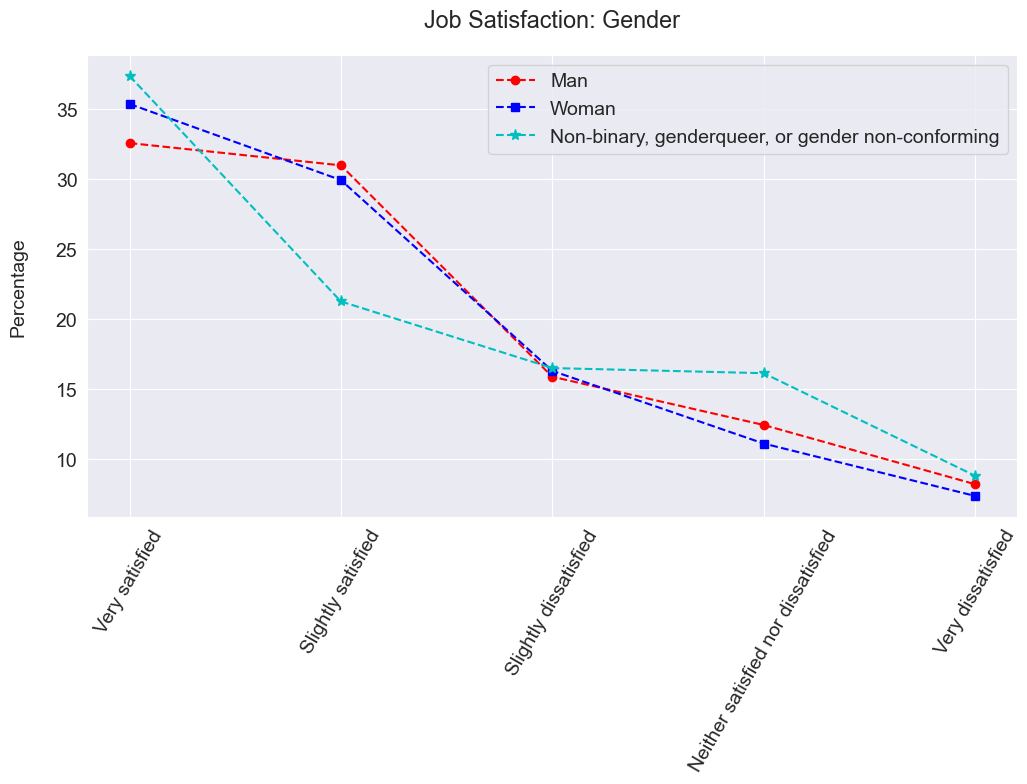

In [178]:
plt.figure(figsize=(12,6))
plt.plot(gender_jobsat['Man'],'o--r',ms=6)
plt.plot(gender_jobsat['Woman'],'s--b')
plt.plot(gender_jobsat['Non-binary, genderqueer, or gender non-conforming'],'*--c',ms=8)
plt.xticks(rotation=60)
plt.title('Job Satisfaction: Gender',pad=20)
plt.ylabel('Percentage',labelpad=20)
plt.legend(['Man', 'Woman', 'Non-binary, genderqueer, or gender non-conforming']);

### The graph shows that around 65% of respondents from all three gender groups—men, women, and non-binary—are satisfied with their jobs. It's encouraging to see that women and non-binary individuals report job satisfaction levels that are nearly the same or even slightly higher than those of men. This suggests a positive trend toward more equitable job satisfaction across genders, reflecting progress in workplace inclusivity and support.
&nbsp;

## Job Factors

In [181]:
schema_df.JobFactors

'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

In [182]:
dev_columns(survey_df.JobFactors)

['Languages, frameworks, and other technologies I’d be working with',
 'Remote work options',
 'Opportunities for professional development',
 'Diversity of the company or organization',
 'Office environment or company culture',
 'Flex time or a flexible schedule',
 'Specific department or team I’d be working on',
 'Financial performance or funding status of the company or organization',
 'Industry that I’d be working in',
 'How widely used or impactful my work output would be',
 'Family friendliness']

In [183]:
job_factors_df=pd.DataFrame(data=False,columns=dev_columns(survey_df.JobFactors),index=survey_df.JobFactors[survey_df.JobFactors.notna()].index)

In [184]:
for i,factors in survey_df.JobFactors[survey_df.JobFactors.notna()].items():
    factors_list=factors.split(';')
    for j in factors_list:
        job_factors_df.at[i,j]=True

In [185]:
job_factors_df

,"Languages, frameworks, and other technologies I’d be working with",Remote work options,Opportunities for professional development,Diversity of the company or organization,Office environment or company culture,Flex time or a flexible schedule,Specific department or team I’d be working on,Financial performance or funding status of the company or organization,Industry that I’d be working in,How widely used or impactful my work output would be,Family friendliness
0,True,True,True,False,False,False,False,False,False,False,False
1,True,False,False,True,True,False,False,False,False,False,False
2,True,False,False,False,True,True,False,False,False,False,False
3,True,False,False,False,True,False,True,False,False,False,False
4,True,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
61773,False,True,False,False,False,False,False,True,False,False,True
61774,True,False,True,False,False,False,False,False,True,False,False
61777,True,True,False,False,False,True,False,False,False,False,False
61779,False,True,True,False,False,True,False,False,False,False,False


In [186]:
job_factors_percent=(job_factors_df.sum()*100/job_factors_df.sum().sum()).sort_values(ascending=False)
job_factors_percent

Languages, frameworks, and other technologies I’d be working with         17.507325
Office environment or company culture                                     15.276924
Flex time or a flexible schedule                                          14.951047
Opportunities for professional development                                14.004145
Remote work options                                                       11.354963
How widely used or impactful my work output would be                       7.111413
Industry that I’d be working in                                            5.211177
Family friendliness                                                        4.158508
Financial performance or funding status of the company or organization     4.032731
Specific department or team I’d be working on                              4.013435
Diversity of the company or organization                                   2.378332
dtype: float64

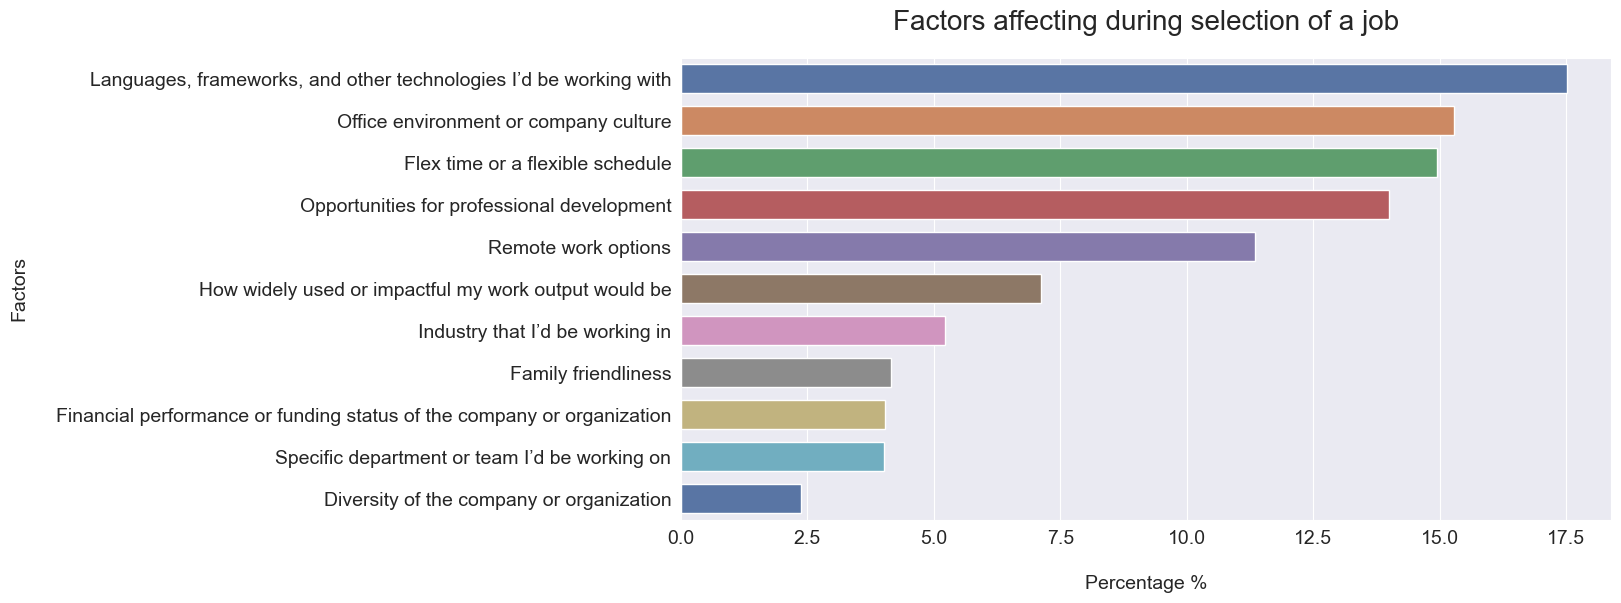

In [187]:
plt.figure(figsize=(12,6))
sns.barplot(y=job_factors_percent.index,x=job_factors_percent,palette='deep',width=0.7)
plt.title('Factors affecting during selection of a job',pad=20,fontsize=20)
plt.xlabel('Percentage %',labelpad=20)
plt.ylabel('Factors',labelpad=20);

### The graph reveals that the top priority for most respondents when choosing a job is the technologies and frameworks they will work with. This is followed by the importance of the office environment or company culture, then the flexibility of the schedule, and opportunities for professional development. Other factors, though still important, rank lower. This indicates that modern professionals place a high value on the tools they use and the work environment, which directly influence their satisfaction and growth potential in a role.
&nbsp;

## Working Overtime

In [190]:
schema_df.NEWOvertime

'How often do you work overtime or beyond the formal time expectation of your job?'

In [191]:
survey_df.NEWOvertime.value_counts()

NEWOvertime
Sometimes: 1-2 days per month but less than weekly          11158
Often: 1-2 days per week or more                            10614
Occasionally: 1-2 days per quarter but less than monthly     9177
Rarely: 1-2 days per year or less                            6265
Never                                                        4574
Name: count, dtype: int64

In [192]:
overtime_jobsat_series=survey_df.groupby('NEWOvertime')['JobSat'].value_counts()
overtime_jobsat_series

NEWOvertime                                               JobSat                            
Never                                                     Very satisfied                        1387
                                                          Slightly satisfied                    1339
                                                          Slightly dissatisfied                  734
                                                          Neither satisfied nor dissatisfied     607
                                                          Very dissatisfied                      479
Occasionally: 1-2 days per quarter but less than monthly  Very satisfied                        3036
                                                          Slightly satisfied                    2921
                                                          Slightly dissatisfied                 1373
                                                          Neither satisfied nor dissatisfied    116

In [193]:
overtime_list=['Never','Occasionally: 1-2 days per quarter but less than monthly',
               'Often: 1-2 days per week or more',
               'Rarely: 1-2 days per year or less',
               'Sometimes: 1-2 days per month but less than weekly']

In [194]:
for i in overtime_list:
    overtime_jobsat_series[i]=overtime_jobsat_series[i]*100/overtime_jobsat_series[i].sum()

In [195]:
# Converted to percentage

overtime_jobsat_series

NEWOvertime                                               JobSat                            
Never                                                     Very satisfied                        30.510339
                                                          Slightly satisfied                    29.454465
                                                          Slightly dissatisfied                 16.146062
                                                          Neither satisfied nor dissatisfied    13.352398
                                                          Very dissatisfied                     10.536736
Occasionally: 1-2 days per quarter but less than monthly  Very satisfied                        33.147724
                                                          Slightly satisfied                    31.892128
                                                          Slightly dissatisfied                 14.990720
                                                          N

In [196]:
overtime_jobsat=overtime_jobsat_series.to_frame().reset_index()
overtime_jobsat=overtime_jobsat.rename(columns={'count':'percentage'})
overtime_jobsat

,NEWOvertime,JobSat,percentage
0,Never,Very satisfied,30.510339
1,Never,Slightly satisfied,29.454465
2,Never,Slightly dissatisfied,16.146062
3,Never,Neither satisfied nor dissatisfied,13.352398
4,Never,Very dissatisfied,10.536736
5,Occasionally: 1-2 days per quarter but less th...,Very satisfied,33.147724
6,Occasionally: 1-2 days per quarter but less th...,Slightly satisfied,31.892128
7,Occasionally: 1-2 days per quarter but less th...,Slightly dissatisfied,14.990720
8,Occasionally: 1-2 days per quarter but less th...,Neither satisfied nor dissatisfied,12.719729
9,Occasionally: 1-2 days per quarter but less th...,Very dissatisfied,7.249700


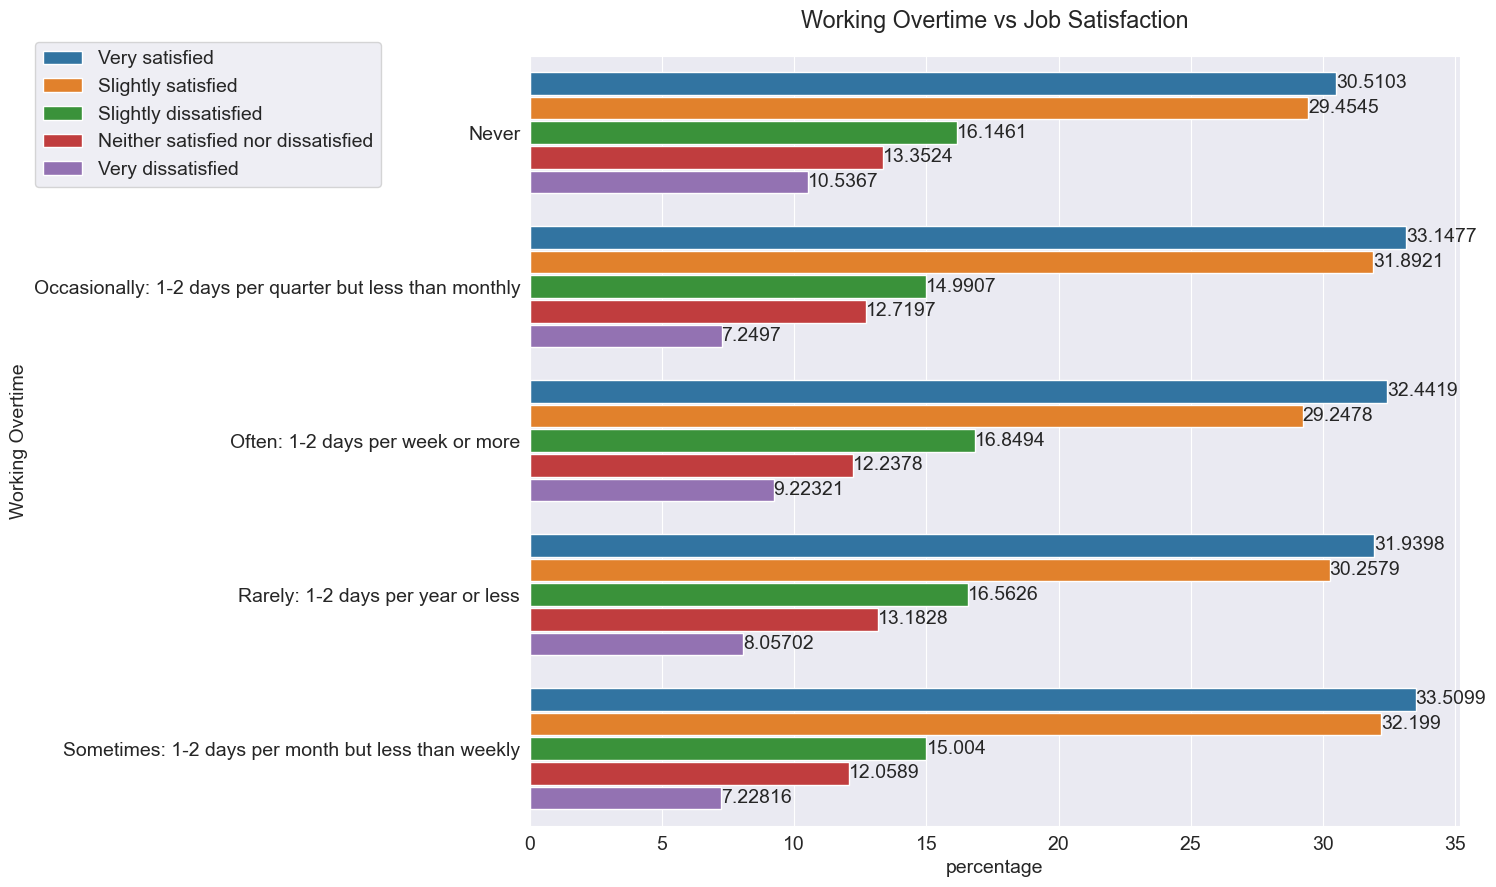

In [197]:
plt.figure(figsize=(12,10))
ax=sns.barplot(y=overtime_jobsat.NEWOvertime,x=overtime_jobsat['percentage'],hue=overtime_jobsat.JobSat,gap=0.08,)
ax.legend(bbox_to_anchor=(-0.15,1.03),frameon=True)
plt.title('Working Overtime vs Job Satisfaction',pad=20)
plt.ylabel('Working Overtime')
for i in ax.containers:
    ax.bar_label(i,)

### The graph illustrates that respondents who occasionally work overtime (1-2 days per month but less than weekly) report the highest job satisfaction, with 65.6% being satisfied. Conversely, those who never work overtime exhibit the highest dissatisfaction rate at 10.5%. This suggests that a moderate amount of overtime can positively impact job satisfaction, possibly because it provides opportunities for additional accomplishments and recognition without leading to burnout. Regular but not excessive overtime may help employees feel more engaged and valued in their roles.
&nbsp;

In [199]:
agegroup_overtime=survey_df.groupby('AgeGroup')['NEWOvertime'].value_counts()
agegroup_overtime

AgeGroup             NEWOvertime                                             
10-18 years          Never                                                         16
                     Often: 1-2 days per week or more                              15
                     Sometimes: 1-2 days per month but less than weekly            11
                     Rarely: 1-2 days per year or less                              6
                     Occasionally: 1-2 days per quarter but less than monthly       3
18-30 years          Sometimes: 1-2 days per month but less than weekly          4327
                     Often: 1-2 days per week or more                            3930
                     Occasionally: 1-2 days per quarter but less than monthly    3426
                     Rarely: 1-2 days per year or less                           2352
                     Never                                                       1917
30-45 years          Sometimes: 1-2 days per month but less th

In [200]:
for i in list(survey_df.AgeGroup.unique()[1:]):
    agegroup_overtime[i]=agegroup_overtime[i]*100/agegroup_overtime[i].sum()

In [201]:
agegroup_overtime

AgeGroup             NEWOvertime                                             
10-18 years          Never                                                       31.372549
                     Often: 1-2 days per week or more                            29.411765
                     Sometimes: 1-2 days per month but less than weekly          21.568627
                     Rarely: 1-2 days per year or less                           11.764706
                     Occasionally: 1-2 days per quarter but less than monthly     5.882353
18-30 years          Sometimes: 1-2 days per month but less than weekly          27.125125
                     Often: 1-2 days per week or more                            24.636409
                     Occasionally: 1-2 days per quarter but less than monthly    21.476931
                     Rarely: 1-2 days per year or less                           14.744233
                     Never                                                       12.017302
30-45 years 

In [202]:
agegroup_overtime_df=agegroup_overtime.to_frame().reset_index()
agegroup_overtime_df

,AgeGroup,NEWOvertime,count
0,10-18 years,Never,31.372549
1,10-18 years,Often: 1-2 days per week or more,29.411765
2,10-18 years,Sometimes: 1-2 days per month but less than we...,21.568627
3,10-18 years,Rarely: 1-2 days per year or less,11.764706
4,10-18 years,Occasionally: 1-2 days per quarter but less th...,5.882353
5,18-30 years,Sometimes: 1-2 days per month but less than we...,27.125125
6,18-30 years,Often: 1-2 days per week or more,24.636409
7,18-30 years,Occasionally: 1-2 days per quarter but less th...,21.476931
8,18-30 years,Rarely: 1-2 days per year or less,14.744233
9,18-30 years,Never,12.017302


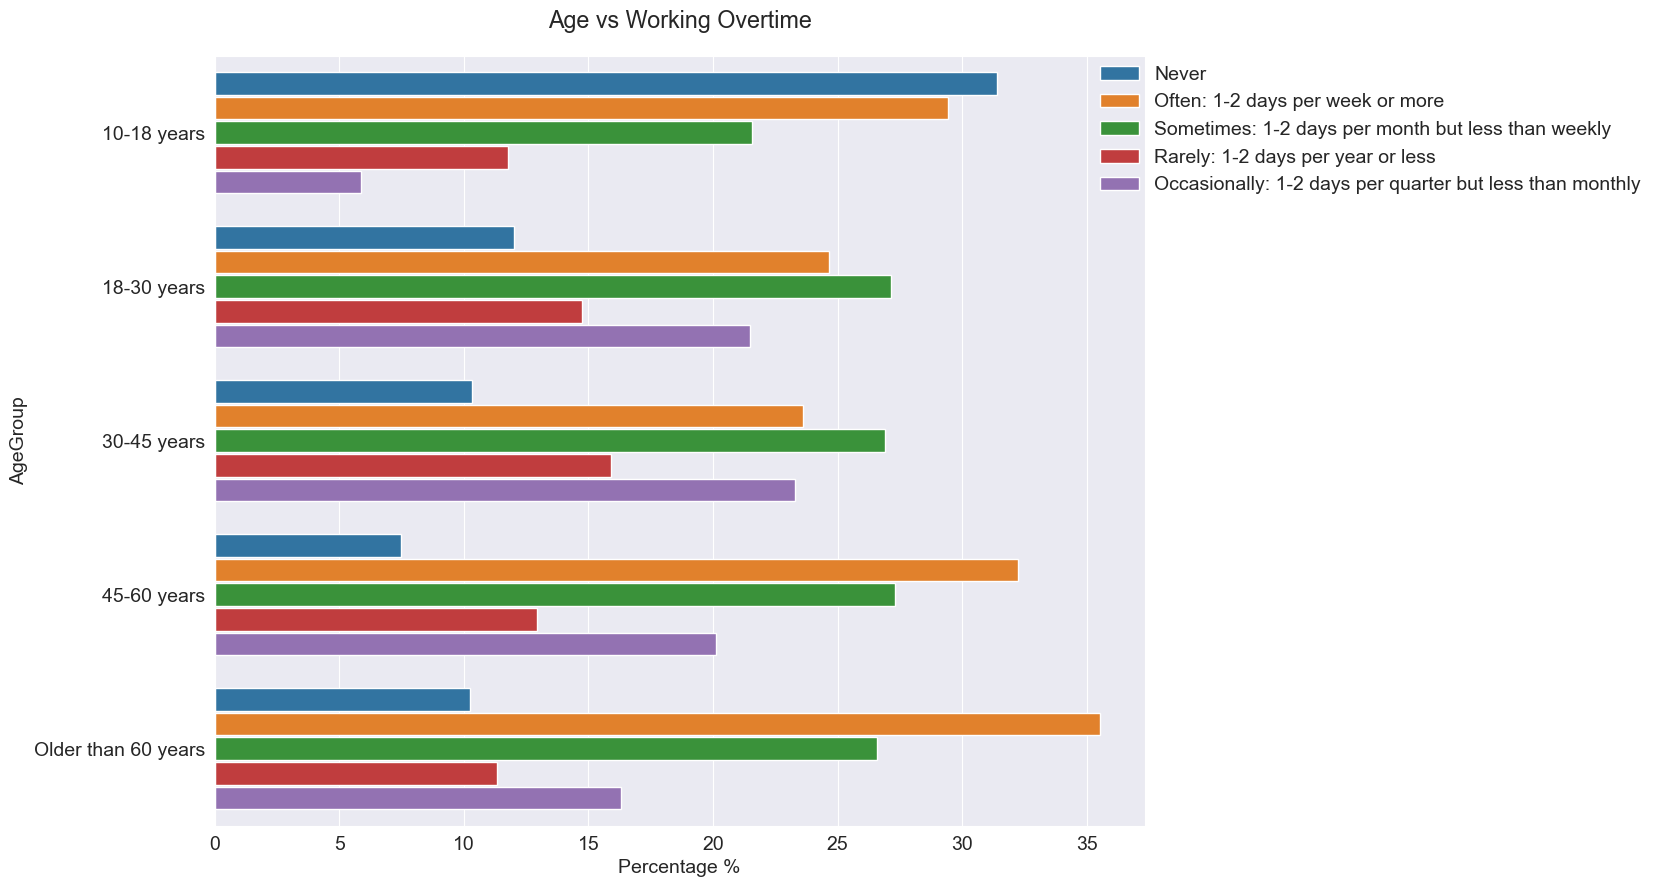

In [485]:
plt.figure(figsize=(12,10))
graph=sns.barplot(y=agegroup_overtime_df.AgeGroup,x=agegroup_overtime_df['count'],hue=agegroup_overtime_df.NEWOvertime,gap=0.08)
plt.title('Age vs Working Overtime',pad=20)
plt.xlabel('Percentage %')
graph.legend(bbox_to_anchor=(0.933,1.01),frameon=False);

### The graph indicates that as people age, they tend to work more overtime. Specifically, over 35% of respondents aged 60 and above report frequently working overtime. This trend suggests that older professionals may be taking on more responsibilities or leadership roles that require extra hours. It could also reflect a commitment to their work or the demands of their positions. As a result, the likelihood of working overtime increases with age, particularly among those in more senior roles.
&nbsp;

## Professional coding experience 

In [206]:
schema_df.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [207]:
schema_df.NEWLearn

'How frequently do you learn a new language or framework?'

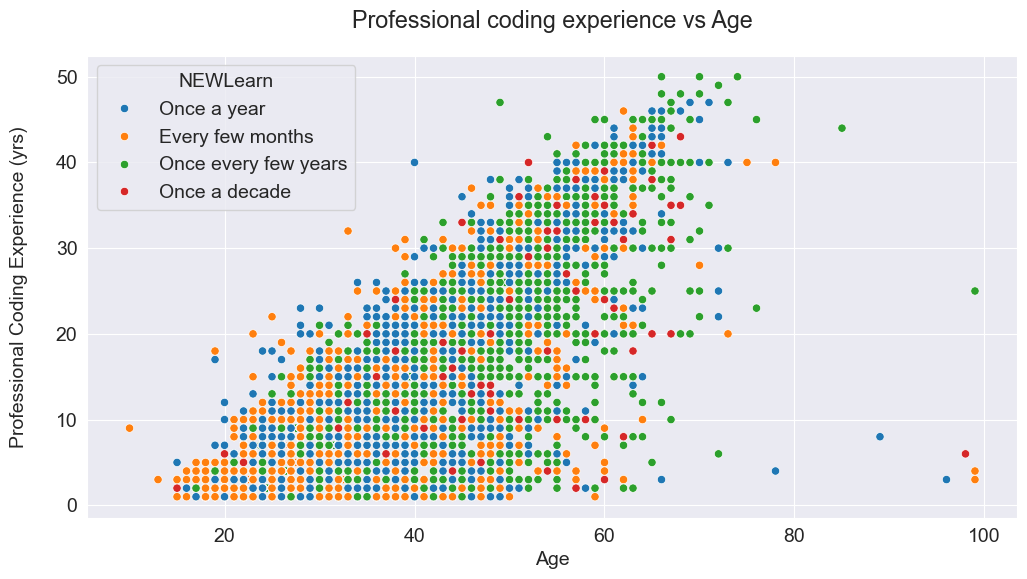

In [208]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=survey_df.Age,y=survey_df.YearsCodePro,hue=survey_df.NEWLearn)
plt.title('Professional coding experience vs Age',pad=20)
plt.ylabel('Professional Coding Experience (yrs)',labelpad=20);

### The graph demonstrates that individuals have started coding at ages as young as below 10 and even above 80, successfully transitioning into professional programming careers. This highlights that it’s never too early or too late to begin coding and build a successful career in the field. Additionally, the graph shows that people under 30 are more actively learning new languages or frameworks compared to those over 30, suggesting that younger professionals are more focused on expanding their skill sets in the rapidly evolving tech landscape.
&nbsp;

## What do you do when you get stuck on a problem?

In [211]:
schema_df.NEWStuck

'What do you do when you get stuck on a problem? Select all that apply.'

In [212]:
survey_df.NEWStuck

0        Visit Stack Overflow;Go for a walk or other ph...
1        Play games;Visit Stack Overflow;Watch help / t...
2        Play games;Call a coworker or friend;Visit Sta...
3        Call a coworker or friend;Visit Stack Overflow...
4        Call a coworker or friend;Visit Stack Overflow...
                               ...                        
61780    Watch help / tutorial videos;Do other work and...
61781                                                  NaN
61782    Call a coworker or friend;Visit Stack Overflow...
61783                                                  NaN
61784                                                  NaN
Name: NEWStuck, Length: 61785, dtype: object

In [214]:
new_stuck_df=pd.DataFrame(data=False,columns=dev_columns(survey_df.NEWStuck),index=survey_df.NEWStuck[survey_df.NEWStuck.notna()].index)
new_stuck_df

,Visit Stack Overflow,Go for a walk or other physical activity,Do other work and come back later,Play games,Watch help / tutorial videos,Call a coworker or friend,Panic,Visit another developer community (please name):,Meditate
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
61776,False,False,False,False,False,False,False,False,False
61777,False,False,False,False,False,False,False,False,False
61779,False,False,False,False,False,False,False,False,False
61780,False,False,False,False,False,False,False,False,False


In [215]:
for i,options in survey_df.NEWStuck[survey_df.NEWStuck.notna()].items():
    options_list=options.split(';')
    for j in options_list:
        new_stuck_df.at[i,j]=True

In [216]:
new_stuck_df

,Visit Stack Overflow,Go for a walk or other physical activity,Do other work and come back later,Play games,Watch help / tutorial videos,Call a coworker or friend,Panic,Visit another developer community (please name):,Meditate
0,True,True,True,False,False,False,False,False,False
1,True,False,True,True,True,False,False,False,False
2,True,True,True,True,True,True,False,False,False
3,True,False,False,False,True,True,False,False,False
4,True,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...
61776,True,False,True,False,False,True,False,False,False
61777,True,False,True,False,False,False,False,False,False
61779,True,False,False,False,True,False,False,False,False
61780,False,False,True,False,True,False,False,False,False


In [217]:
new_stuck_percent=(new_stuck_df.sum()*100/new_stuck_df.sum().sum()).sort_values(ascending=False)
new_stuck_percent

Visit Stack Overflow                                26.739762
Do other work and come back later                   16.075406
Watch help / tutorial videos                        15.567183
Call a coworker or friend                           14.776243
Go for a walk or other physical activity            12.806114
Play games                                           4.404046
Meditate                                             3.420370
Panic                                                3.189864
Visit another developer community (please name):     3.021012
dtype: float64

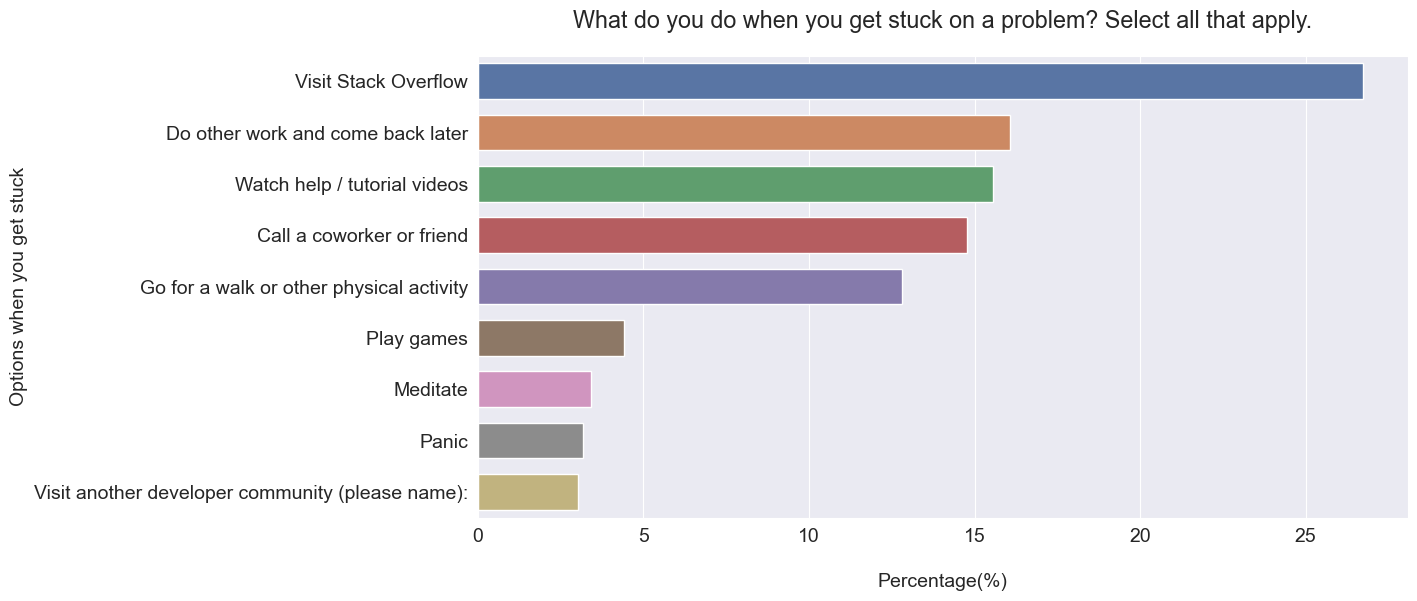

In [218]:
plt.figure(figsize=(12,6))
sns.barplot(y=new_stuck_percent.index,x=new_stuck_percent,palette='deep',width=0.7)
plt.xlabel('Percentage(%)',labelpad=20)
plt.ylabel('Options when you get stuck')
plt.title(schema_df.NEWStuck,pad=20);

&nbsp;
## **Inferences and Conclusions**

### 1. Demographics and Gender Representation:
- #### **Underrepresentation of Women and Non-Binary Individuals**: Only about 8% of survey respondents identify as women or non-binary, highlighting the male dominance in the programming community. This underscores the need for increased diversity and inclusion efforts in the tech industry​.
- #### **Higher Education Levels Among Women**: Women are more likely to hold advanced degrees (Bachelor’s, Master’s, or Ph.D.) compared to their male counterparts, indicating that women in tech often pursue higher education as a means to advance in a traditionally male-dominated field​.
### 2. Programming Experience and Learning Patterns:
- #### **Diverse Age of Learning to Code**: Respondents have started coding at a wide range of ages, from below 10 to above 80, showing that learning to code can begin at any stage of life. This reinforces the idea that it’s never too early or too late to start a programming career.
- #### **Proactive Learning Among Younger Respondents**: Individuals under 30 are more actively learning new programming languages and frameworks than those over 30, reflecting a strong focus on continuous skill development among younger professionals.
### 3. Job Satisfaction and Work Hours:
- #### **Impact of Overtime on Job Satisfaction**: Respondents who work occasional overtime (1-2 days per month) report the highest job satisfaction, indicating that moderate overtime might enhance engagement and job fulfillment. However, excessive overtime correlates with lower satisfaction levels, pointing to the importance of maintaining a balanced workload.
- #### **Satisfaction vs. Dissatisfaction**: Those who never work overtime show the highest dissatisfaction rates, suggesting that a complete absence of overtime might be perceived as a lack of challenge or engagement in the workplace.
### 4. Importance of Formal Education:
- #### **Diverse Views on CS Education**: Nearly 60% of respondents with a computer science background believe that formal education is important for a CS career. However, about 40% feel it is not essential, highlighting a growing recognition of alternative education paths like coding boot camps, online courses, and self-learning​.
- #### **Non-CS Graduates' Perception**: Approximately 25% of those with non-CS degrees believe formal CS education is unnecessary, emphasizing the increasing accessibility of programming skills outside traditional academic pathways.
### 5. Technological Preferences and Adoption:
- #### **Popular Programming Languages**: The most commonly used languages include JavaScript, HTML/CSS, SQL, and Python, reflecting their dominance in web development, data analysis, and backend services. The high adoption rates suggest these skills are crucial for most developers.
- #### **Interest in Learning Python**: Python ranks highly as the most desired language to learn due to its simplicity and versatility, indicating a trend toward languages that offer broad application in fields like data science, machine learning, and automation.
### 6. Work Hours by Age and Role:
- #### **Increased Overtime Among Older Professionals**: Respondents over 60 years old are more likely to work overtime frequently, which may be due to senior-level responsibilities or leadership roles. This suggests a potential trade-off between experience and work-life balance for older professionals.
- #### **Work Hours Across Countries**: Average work hours remain close to the 40-hour mark across most countries, with some exceptions like Iran and Israel. This consistency suggests that excessive work hours are not the norm, promoting healthier work environments globally.
### 7. Employment Types and Trends:
- #### **Predominance of Full-Time Employment**: The majority of respondents are employed full-time, followed by students and freelancers, indicating a stable job market for developers. Full-time roles are also more prevalent among those identifying as professional developers.
- #### **Variety of Developer Roles**: Respondents reported a wide range of job roles, often selecting multiple options such as full-stack, front-end, or back-end development, highlighting the diverse skill sets and responsibilities within the tech industry.